Test Task Autodoc by Alberto Mengual

# Instructions

The main task is to perform analysis for the __subscription commerce project__.  
  
Operational analytics is required to make a decision whether the company
is __ready to scale the business and expand the team__.  
  
Net profit from a subscription sale is 40%.  
  
The result of the analysis should be displayed with an __interactive dashboard__ that allows to track the dynamics of the following metrics:
* Dynamics of the number of purchased subscriptions by month
* Dynamics of the number of active subscriptions by month
* Revenue dynamics
* Churn rate
* LTV
* Any other metrics are encouraged



Bonus:  
- define the packages a subscription price increase is possible for. Explain the results.
- determine if there are data anomalies

__Tools__:    

Any visualization tool  

Calculations: sql, python...

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from datetime import datetime

In [199]:
from statsmodels.graphics.mosaicplot import mosaic

In [1]:
%matplotlib inline

In [440]:
pd.set_option('display.max_columns', None)

# Funtions

# Load Data

In [3]:
subs = pd.read_csv("data/subscription_dataset_DA_test_task.csv")

In [4]:
subs

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,4/16/2021 11:47,68373,511,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN
1,5/16/2021 12:01,68373,511,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN
2,5/4/2021 15:15,29867,515,purchase,month,smart plus,8.99,NaN,NaN,NaN,NaN
3,5/31/2021 5:24,29867,511,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN
4,3/21/2021 8:29,63044,456,purchase,year,smart,25.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
46009,4/18/2021 13:32,68182,503,cancelation,month,enterprise,10.99,NaN,NaN,NaN,NaN
46010,4/11/2021 13:49,67305,475,cancelation,trial,trial smart,0.00,NaN,NaN,NaN,NaN
46011,4/11/2021 16:33,67362,475,cancelation,trial,trial smart,0.00,NaN,NaN,NaN,NaN
46012,4/12/2021 19:29,67655,497,purchase,month,enterprise,10.99,NaN,NaN,NaN,NaN


# General info

In [5]:
subs.shape

(46014, 11)

In [7]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sale_date           46014 non-null  object 
 1   license_id          46014 non-null  int64  
 2   license_plan_id     46014 non-null  int64  
 3   operation_type      46014 non-null  object 
 4   billing_period      46014 non-null  object 
 5   license_name        46014 non-null  object 
 6   billing_plan_price  46014 non-null  float64
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.9+ MB


## drop the empty columns

In [12]:
subs = subs.iloc[:,0:7]
subs.shape

(46014, 7)

In [14]:
subs.describe()

,license_id,license_plan_id,billing_plan_price
count,46014.000000,46014.000000,46014.000000
mean,47753.293519,483.452514,9.543123
std,17775.312557,31.005330,6.168696
min,2971.000000,370.000000,0.000000
25%,37045.500000,451.000000,3.500000
50%,49877.500000,497.000000,10.990000
75%,60942.000000,499.000000,10.990000
max,76549.000000,605.000000,120.000000


In [16]:
subs.describe(include='object')

,sale_date,operation_type,billing_period,license_name
count,46014,46014,46014,46014
unique,23238,2,3,4
top,1/8/2021 23:01,purchase,month,enterprise
freq,101,34651,36188,22040


## datetime features

In [37]:
subs.sale_date = pd.to_datetime(subs.sale_date)

In [38]:
subs.head()

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00


In [42]:
subs.sale_date.min()

Timestamp('2020-12-13 01:00:00')

In [43]:
subs.sale_date.max()

Timestamp('2021-06-06 12:26:00')

In [45]:
subs['sale_month'] = subs.sale_date.apply(lambda x: x.month)

In [47]:
subs['sale_year'] = subs.sale_date.apply(lambda x: x.year)

In [48]:
subs.head()

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021


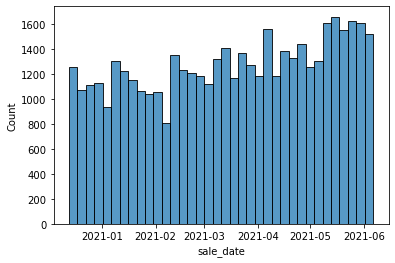

In [52]:
sns.histplot(subs.sale_date);

In [53]:
subs.dtypes

sale_date             datetime64[ns]
license_id                     int64
license_plan_id                int64
operation_type                object
billing_period                object
license_name                  object
billing_plan_price           float64
sale_month                     int64
sale_year                      int64
dtype: object

## Remove duplicates

In [65]:
index0 = subs.index
index0

RangeIndex(start=0, stop=46014, step=1)

In [66]:
subs.drop_duplicates(inplace = True, ignore_index = True)

In [67]:
subs.shape

(45988, 9)

In [81]:
# number of duplicated rows:
len(index0)-subs.shape[0]

26

# Save cleaned dataframe

In [79]:
subs.to_csv('data/subscriptions_clean.csv')

# Explore Data

In [68]:
for c in subs.columns:
    print(subs[c].nunique(), c)

23238 sale_date
21509 license_id
78 license_plan_id
2 operation_type
3 billing_period
4 license_name
17 billing_plan_price
7 sale_month
2 sale_year


In [69]:
# Check missing values
subs.isna().sum()

sale_date             0
license_id            0
license_plan_id       0
operation_type        0
billing_period        0
license_name          0
billing_plan_price    0
sale_month            0
sale_year             0
dtype: int64

## Categorical Features

In [ ]:
# Explore Categorical Features

In [70]:
subs.operation_type.value_counts()

purchase       34639
cancelation    11349
Name: operation_type, dtype: int64

In [71]:
subs.billing_period.value_counts()

month    36172
year      5840
trial     3976
Name: billing_period, dtype: int64

In [72]:
subs.license_name.value_counts()

enterprise     22026
smart          11824
smart plus      8162
trial smart     3976
Name: license_name, dtype: int64

In [73]:
subs.billing_plan_price.value_counts()

10.99     19512
3.50       9261
8.99       7188
0.00       3976
25.00      2252
19.99      1964
15.99       973
18.99       399
20.00       235
12.99       137
3.99         33
4.00         26
40.00        13
120.00       11
15.00         3
8.00          3
45.00         2
Name: billing_plan_price, dtype: int64

## Date time features

In [74]:
subs.sale_year.value_counts()

2021    41466
2020     4522
Name: sale_year, dtype: int64

In [75]:
subs.sale_month[subs.sale_year == 2020].value_counts()

12    4522
Name: sale_month, dtype: int64

In [76]:
subs.sale_month.value_counts()

5     9729
4     8323
3     8110
1     7043
2     6547
12    4522
6     1714
Name: sale_month, dtype: int64

The data in months 6 and 12 are not completely meaningful as they do not consider the whole month.

In [ ]:
# January - May DataFrame

In [84]:
janMay = subs[subs.sale_month.isin([1,2,3,4,5])]
janMay

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021
...,...,...,...,...,...,...,...,...,...
45983,2021-04-18 13:32:00,68182,503,cancelation,month,enterprise,10.99,4,2021
45984,2021-04-11 13:49:00,67305,475,cancelation,trial,trial smart,0.00,4,2021
45985,2021-04-11 16:33:00,67362,475,cancelation,trial,trial smart,0.00,4,2021
45986,2021-04-12 19:29:00,67655,497,purchase,month,enterprise,10.99,4,2021


# Purchased subscriptions by month

In [85]:
janMay

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021
...,...,...,...,...,...,...,...,...,...
45983,2021-04-18 13:32:00,68182,503,cancelation,month,enterprise,10.99,4,2021
45984,2021-04-11 13:49:00,67305,475,cancelation,trial,trial smart,0.00,4,2021
45985,2021-04-11 16:33:00,67362,475,cancelation,trial,trial smart,0.00,4,2021
45986,2021-04-12 19:29:00,67655,497,purchase,month,enterprise,10.99,4,2021


## Operation Type

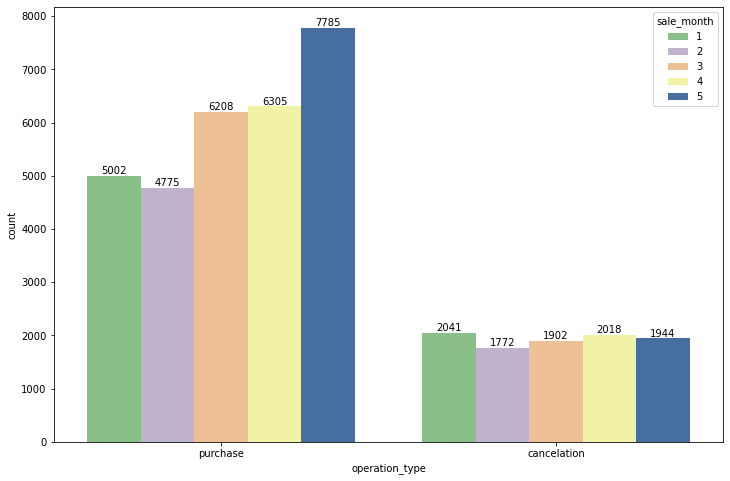

In [99]:
f,ax = plt.subplots(1,1,figsize= (12,8))

sns.countplot(x='operation_type', hue='sale_month',data=janMay, palette = 'Accent', ax=ax)

#ax[0].bar_label(ax[0].containers[0], label_type='edge')
# print(ax.containers)

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
    
plt.show()

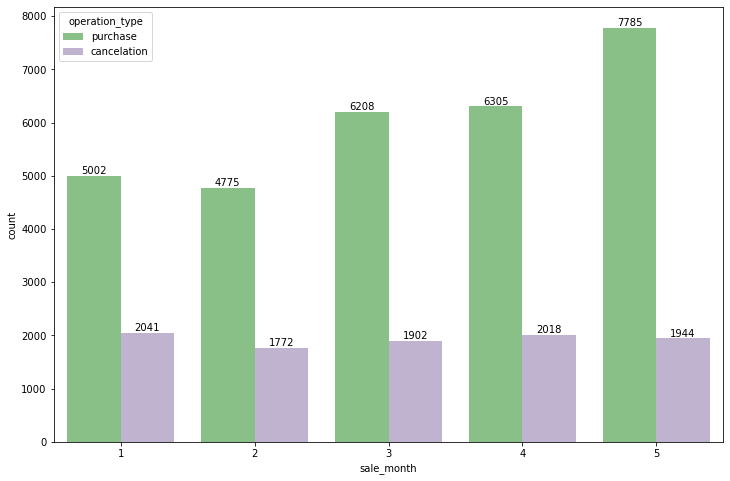

In [109]:
f,ax = plt.subplots(1,1,figsize= (12,8))

sns.countplot(x='sale_month', hue='operation_type',data=janMay, palette = 'Accent', ax=ax)

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

    plt.show()

In [114]:
janMay.groupby(['sale_month', 'operation_type']).agg({'billing_plan_price':'count'}).T

sale_month                   1                    2                    3  \
operation_type     cancelation purchase cancelation purchase cancelation   
billing_plan_price        2041     5002        1772     4775        1902   

sale_month                            4                    5           
operation_type     purchase cancelation purchase cancelation purchase  
billing_plan_price     6208        2018     6305        1944     7785

## Just purchase

In [100]:
purchase = janMay[janMay.operation_type == 'purchase']

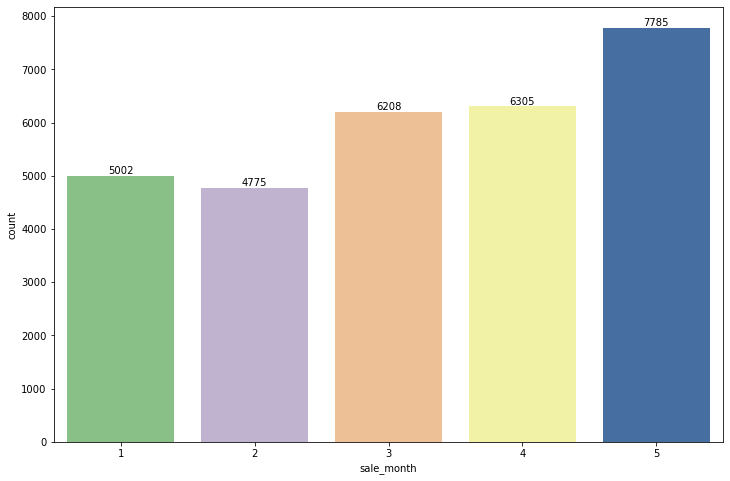

In [102]:
f,ax = plt.subplots(1,1,figsize= (12,8))

sns.countplot(x='sale_month',data=purchase, palette = 'Accent', ax=ax)

ax.bar_label(ax.containers[0], label_type='edge')

#for bars in ax.containers:
#    ax.bar_label(bars, label_type='edge')

plt.show()

In [120]:
purchase.groupby('sale_month').agg({'billing_plan_price':'count'}).rename(columns={'billing_plan_price':'subscriptions'}).T


sale_month,1,2,3,4,5
subscriptions,5002,4775,6208,6305,7785


## License Name

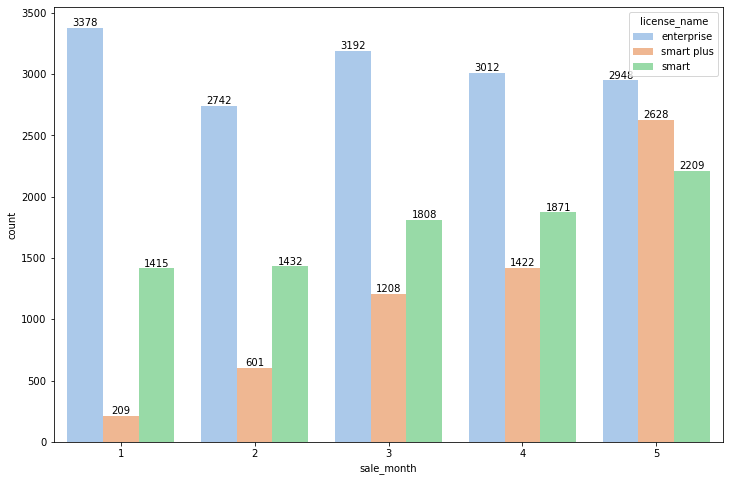

In [105]:
f,ax = plt.subplots(1,1,figsize= (12,8))
sns.countplot(x='sale_month', hue = 'license_name',data=purchase, palette = 'pastel', ax=ax)

#ax.bar_label(ax.containers[0], label_type='edge')

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

plt.show()

In [122]:
purchase.pivot_table(index=['sale_month','license_name'], 
                     values = ['billing_plan_price'], 
                     aggfunc = 'count').T

sale_month                  1                           2                   \
license_name       enterprise smart smart plus enterprise smart smart plus   
billing_plan_price       3378  1415        209       2742  1432        601   

sale_month                  3                           4                   \
license_name       enterprise smart smart plus enterprise smart smart plus   
billing_plan_price       3192  1808       1208       3012  1871       1422   

sale_month                  5                   
license_name       enterprise smart smart plus  
billing_plan_price       2948  2209       2628

There is an __anomalie__:  

In may smart plus licenses increase the number of smart licences.

## Billing Period

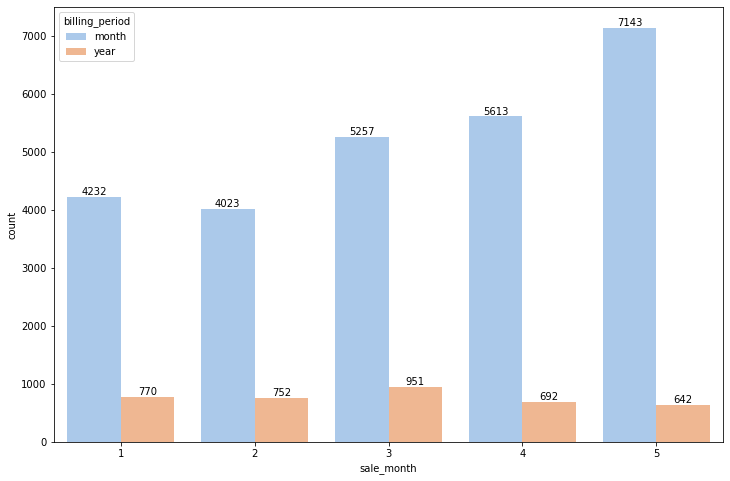

In [108]:
f,ax = plt.subplots(1,1,figsize= (12,8))
sns.countplot(x='sale_month', hue = 'billing_period',data=purchase, palette = 'pastel', ax=ax)

#ax.bar_label(ax.containers[0], label_type='edge')

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

plt.show()

In [127]:
purchase.pivot_table(index=['sale_month','billing_period'], 
                     values = ['billing_plan_price'], 
                     aggfunc = 'count').rename(columns={'billing_plan_price':'subscriptions'}).T

sale_month         1          2          3          4          5     
billing_period month year month year month year month year month year
subscriptions   4232  770  4023  752  5257  951  5613  692  7143  642

# Active Subscriptions

In [129]:
subs.head(10)

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021
5,2020-12-30 16:01:00,30688,497,purchase,month,enterprise,10.99,12,2020
6,2021-01-27 17:01:00,30688,497,purchase,month,enterprise,10.99,1,2021
7,2021-02-27 17:01:00,30688,497,purchase,month,enterprise,10.99,2,2021
8,2021-03-29 18:01:00,30688,497,purchase,month,enterprise,10.99,3,2021
9,2021-04-29 22:02:00,30688,497,cancelation,month,enterprise,10.99,4,2021


In [ ]:
# !!! Exclude trial cancelations from active subscriptions
# !!! Monthly subscriptions must be renewed every month, unlike yearly subscriptions

In [533]:
active2 = subs[subs.license_name != 'trial smart'].pivot_table(index=['sale_year','sale_month'],
                                                              columns= ['billing_period','operation_type'],
                                                              values = ['billing_plan_price'],
                                                              aggfunc = 'count')
active2.columns=['month_cancel','month_purch', 'year_cancel', 'year_purch']
#active2.reset_index(inplace=True)
active2

month_cancel  month_purch  year_cancel  year_purch
sale_year sale_month                                                    
2020      12                   555         2397          199         752
2021      1                    917         4232          126         770
          2                    832         4023          175         752
          3                   1049         5257          237         951
          4                   1222         5613          234         692
          5                   1387         7143          190         642
          6                    235         1310           15         105

In [ ]:
# yearly subscriptions not cancelled remain active then

In [537]:
active2['year_new'] = active2.year_purch-active2.year_cancel
active2['year_active'] = active2.year_new.cumsum()
active2['month_new'] = active2.month_purch-active2.month_cancel
# Monthly Active Users
active2['mau'] = active2.year_active+active2.month_new

active2

month_cancel  month_purch  year_cancel  year_purch  \
sale_year sale_month                                                       
2020      12                   555         2397          199         752   
2021      1                    917         4232          126         770   
          2                    832         4023          175         752   
          3                   1049         5257          237         951   
          4                   1222         5613          234         692   
          5                   1387         7143          190         642   
          6                    235         1310           15         105   

                      year_new  year_active  month_new   mau  
sale_year sale_month                                          
2020      12               553          553       1842  2395  
2021      1                644         1197       3315  4512  
          2                577         1774       3191  4965  
          3                714         2488       4208  6696  
          4                458         2946       4391  7337  
          5                452         3398       5756  9154  
          6                 90         3488       1075  4563

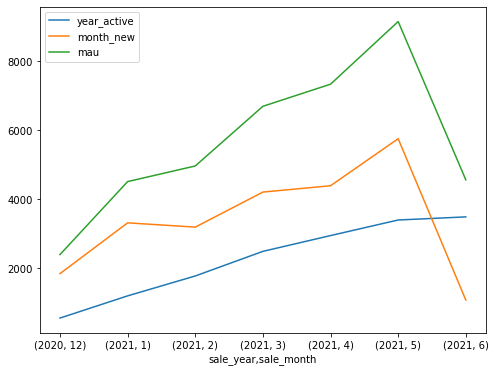

In [540]:
active2[['year_active','month_new', 'mau']].plot(figsize=(8,6));

## Monthly Churn Rate

In [548]:
mcr2 = active2.copy()
mcr2.reset_index(inplace=True)
mcr2

,sale_year,sale_month,month_cancel,month_purch,year_cancel,year_purch,year_new,year_active,month_new,mau
0,2020,12,555,2397,199,752,553,553,1842,2395
1,2021,1,917,4232,126,770,644,1197,3315,4512
2,2021,2,832,4023,175,752,577,1774,3191,4965
3,2021,3,1049,5257,237,951,714,2488,4208,6696
4,2021,4,1222,5613,234,692,458,2946,4391,7337
5,2021,5,1387,7143,190,642,452,3398,5756,9154
6,2021,6,235,1310,15,105,90,3488,1075,4563


In [552]:
# Monthly Churn Rate
#mcr2['mcr'] = [(mcr2.month_cancel[i]+mcr2.year_cancel[i])/mcr2.mau[i-1] for i in range(1,len(mcr2))] # if i > 0 else 0]

#mcr2


ValueError: Length of values (6) does not match length of index (7)

In [558]:
mcrList = []
for i in range(len(mcr2)):
    if i == 0:
        mcrList.append(1)
    else:
        x = (mcr2.month_cancel[i]+mcr2.year_cancel[i])/mcr2.mau[i-1]
        mcrList.append(round(x,4))
mcrList

[1, 0.4355, 0.2232, 0.259, 0.2174, 0.2149, 0.0273]

In [559]:
mcr2['mcr'] = mcrList
mcr2

,sale_year,sale_month,month_cancel,month_purch,year_cancel,year_purch,year_new,year_active,month_new,mau,mcr
0,2020,12,555,2397,199,752,553,553,1842,2395,1.0000
1,2021,1,917,4232,126,770,644,1197,3315,4512,0.4355
2,2021,2,832,4023,175,752,577,1774,3191,4965,0.2232
3,2021,3,1049,5257,237,951,714,2488,4208,6696,0.2590
4,2021,4,1222,5613,234,692,458,2946,4391,7337,0.2174
5,2021,5,1387,7143,190,642,452,3398,5756,9154,0.2149
6,2021,6,235,1310,15,105,90,3488,1075,4563,0.0273


## Intial Approach - not accurate

In [189]:
active = subs[subs.license_name != 'trial smart'].pivot_table(index=['sale_year','sale_month'],
                                                              columns= ['operation_type'],
                                                              values = ['billing_plan_price'],
                                                              aggfunc = 'count')
active.columns=['cancelation','purchase']
active.reset_index(inplace=True)
active

,sale_year,sale_month,cancelation,purchase
0,2020,12,754,3149
1,2021,1,1043,5002
2,2021,2,1007,4775
3,2021,3,1286,6208
4,2021,4,1456,6305
5,2021,5,1577,7785
6,2021,6,250,1415


In [159]:
"""
active = subs.pivot_table(index=['sale_year','sale_month'],
                 columns= ['operation_type'],
                 values = ['billing_plan_price'],
                 aggfunc = 'count')
active.columns=['cancelation','purchase']
active.reset_index(inplace=True)
active
"""

,sale_year,sale_month,cancelation,purchase
0,2020,12,1373,3149
1,2021,1,2041,5002
2,2021,2,1772,4775
3,2021,3,1902,6208
4,2021,4,2018,6305
5,2021,5,1944,7785
6,2021,6,299,1415


In [195]:
active['new'] = active.purchase - active.cancelation
active

,sale_year,sale_month,cancelation,purchase,new
0,2020,12,754,3149,2395
1,2021,1,1043,5002,3959
2,2021,2,1007,4775,3768
3,2021,3,1286,6208,4922
4,2021,4,1456,6305,4849
5,2021,5,1577,7785,6208
6,2021,6,250,1415,1165


In [196]:
active['active'] = active.new.cumsum()
active

,sale_year,sale_month,cancelation,purchase,new,active
0,2020,12,754,3149,2395,2395
1,2021,1,1043,5002,3959,6354
2,2021,2,1007,4775,3768,10122
3,2021,3,1286,6208,4922,15044
4,2021,4,1456,6305,4849,19893
5,2021,5,1577,7785,6208,26101
6,2021,6,250,1415,1165,27266


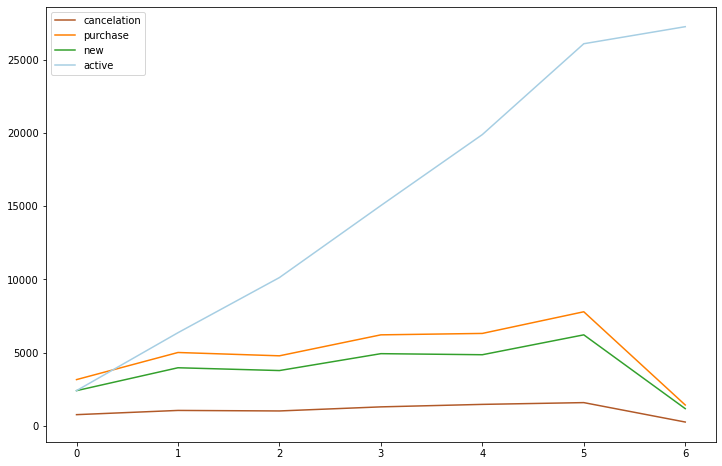

In [197]:
active.iloc[:,2:].plot(figsize=(12,8), colormap = 'Paired_r');

## Save active

In [541]:
#active.to_csv('data/active_subscriptions.csv')
active2.to_csv('data/active_subscriptions.csv')

## License Name - repeat

In [ ]:
# active_l_m ... pending

In [219]:
license_df = subs.pivot_table(index=['sale_year','sale_month'],
                 columns= ['license_name','operation_type'],
                 values = ['billing_plan_price'],
                 aggfunc = 'count')

license_df.columns=['enterprise_cancel', 'enterprise_purch', 
                    'smart_cancel', 'smart_purch',
                    'sPlus_cancel', 'sPlus_purch', 
                    'trial_cancel']

# license_df.reset_index(drop=True, inplace= True)

license_df

enterprise_cancel  enterprise_purch  smart_cancel  \
sale_year sale_month                                                      
2020      12                        494              2068           191   
2021      1                         759              3378           228   
          2                         695              2742           224   
          3                         753              3192           303   
          4                         748              3012           347   
          5                         671              2948           378   
          6                          98               468            49   

                      smart_purch  sPlus_cancel  sPlus_purch  trial_cancel  
sale_year sale_month                                                        
2020      12                  987            69           94           619  
2021      1                  1415            56          209           998  
          2                  1432            88          601           765  
          3                  1808           230         1208           616  
          4                  1871           361         1422           562  
          5                  2209           528         2628           367  
          6                   382           103          565            49

The trial subscriptions do not show purchase but just cancelation

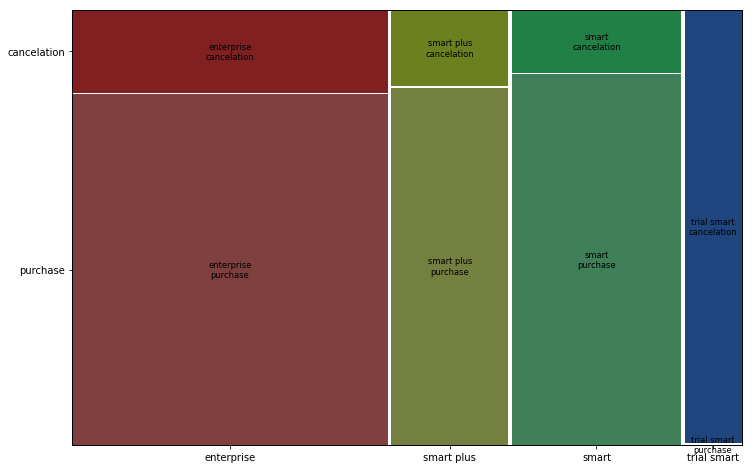

In [217]:
f, ax = plt.subplots(figsize=(10,10))
mosaic(subs, ['license_name','operation_type'], ax = ax)
plt.show()

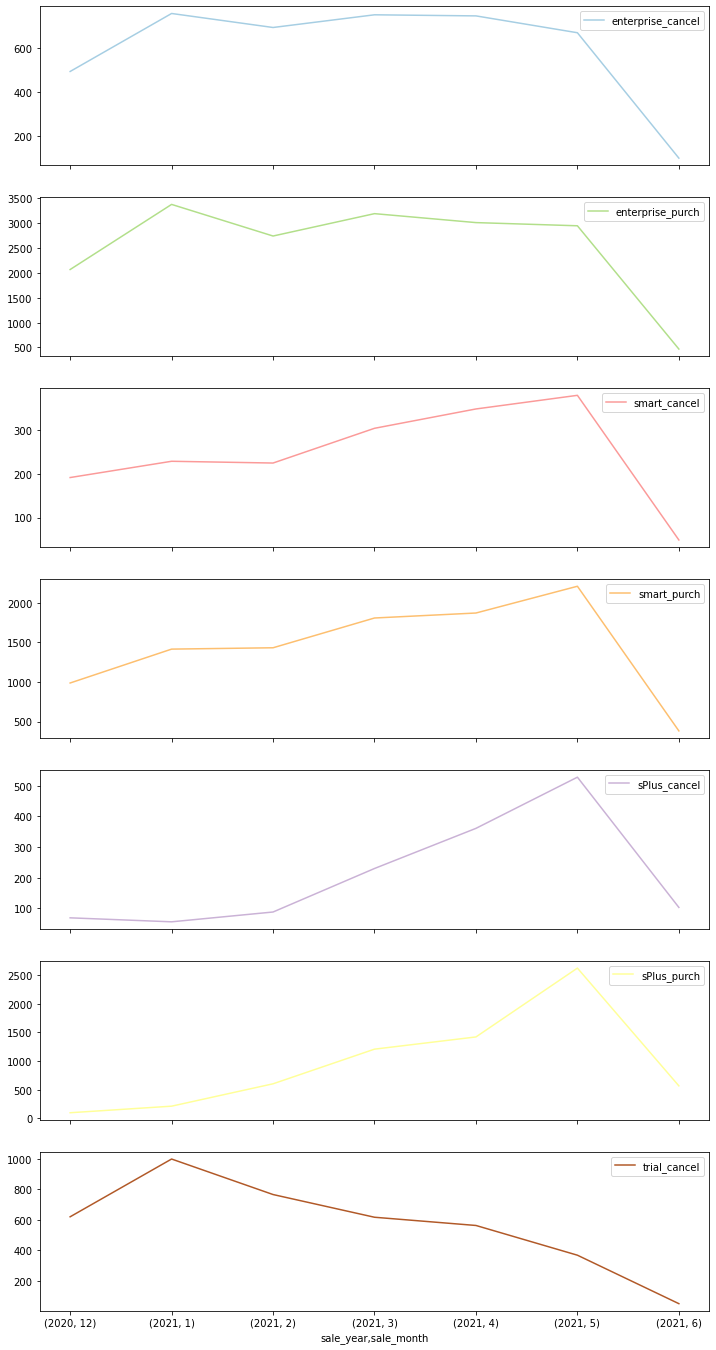

In [220]:
license_df.plot(subplots = True, figsize=(12,24), colormap = 'Paired'); 

The amount of trial cancelations is decresing.  
The number of smart plus subscriptions is increasing highly (as well as cancelations).  
(S Plus - Churn rate?).  
Smart subscriptions increases slowly and constantly.  
(increasing ratios ???)  


### Check trial smart license

In [184]:
subs.head()

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021


In [185]:
subs.license_name.unique()

array(['enterprise', 'smart plus', 'smart', 'trial smart'], dtype=object)

In [191]:
subs[subs.license_name == 'trial smart']

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
36,2020-12-25 06:35:00,47035,475,cancelation,trial,trial smart,0.0,12,2020
42,2021-04-23 08:12:00,67596,496,cancelation,trial,trial smart,0.0,4,2021
43,2021-04-12 15:02:00,67601,475,cancelation,trial,trial smart,0.0,4,2021
60,2021-01-26 23:02:00,48972,475,cancelation,trial,trial smart,0.0,1,2021
61,2021-03-13 17:39:00,61307,475,cancelation,trial,trial smart,0.0,3,2021
...,...,...,...,...,...,...,...,...,...
45966,2021-02-06 10:10:00,54473,475,cancelation,trial,trial smart,0.0,2,2021
45970,2021-02-10 22:01:00,51105,475,cancelation,trial,trial smart,0.0,2,2021
45981,2021-04-20 22:40:00,67297,475,cancelation,trial,trial smart,0.0,4,2021
45984,2021-04-11 13:49:00,67305,475,cancelation,trial,trial smart,0.0,4,2021


In [187]:
subs[subs.license_name == 'trial smart'].operation_type.value_counts()

cancelation    3976
Name: operation_type, dtype: int64

In [194]:
subs[subs.billing_period == 'trial'].operation_type.value_counts()

cancelation    3976
Name: operation_type, dtype: int64

### New and active subscriptions by License

In [221]:
license_df['enterprise_new'] = license_df.enterprise_purch-license_df.enterprise_cancel

In [222]:
license_df['enterprise_active'] = license_df.enterprise_new.cumsum()
#license_df

enterprise_cancel  enterprise_purch  smart_cancel  \
sale_year sale_month                                                      
2020      12                        494              2068           191   
2021      1                         759              3378           228   
          2                         695              2742           224   
          3                         753              3192           303   
          4                         748              3012           347   
          5                         671              2948           378   
          6                          98               468            49   

                      smart_purch  sPlus_cancel  sPlus_purch  trial_cancel  \
sale_year sale_month                                                         
2020      12                  987            69           94           619   
2021      1                  1415            56          209           998   
          2                  1432            88          601           765   
          3                  1808           230         1208           616   
          4                  1871           361         1422           562   
          5                  2209           528         2628           367   
          6                   382           103          565            49   

                      enterprise_new  enterprise_active  
sale_year sale_month                                     
2020      12                    1574               1574  
2021      1                     2619               4193  
          2                     2047               6240  
          3                     2439               8679  
          4                     2264              10943  
          5                     2277              13220  
          6                      370              13590

In [223]:
license_df['smart_new'] = license_df.smart_purch-license_df.smart_cancel
license_df['smart_active'] = license_df.smart_new.cumsum()

license_df['sPlus_new'] = license_df.sPlus_purch-license_df.sPlus_cancel
license_df['sPlus_active'] = license_df.sPlus_new.cumsum()

license_df

enterprise_cancel  enterprise_purch  smart_cancel  \
sale_year sale_month                                                      
2020      12                        494              2068           191   
2021      1                         759              3378           228   
          2                         695              2742           224   
          3                         753              3192           303   
          4                         748              3012           347   
          5                         671              2948           378   
          6                          98               468            49   

                      smart_purch  sPlus_cancel  sPlus_purch  trial_cancel  \
sale_year sale_month                                                         
2020      12                  987            69           94           619   
2021      1                  1415            56          209           998   
          2                  1432            88          601           765   
          3                  1808           230         1208           616   
          4                  1871           361         1422           562   
          5                  2209           528         2628           367   
          6                   382           103          565            49   

                      enterprise_new  enterprise_active  smart_new  \
sale_year sale_month                                                 
2020      12                    1574               1574        796   
2021      1                     2619               4193       1187   
          2                     2047               6240       1208   
          3                     2439               8679       1505   
          4                     2264              10943       1524   
          5                     2277              13220       1831   
          6                      370              13590        333   

                      smart_active  sPlus_new  sPlus_active  
sale_year sale_month                                         
2020      12                   796         25            25  
2021      1                   1983        153           178  
          2                   3191        513           691  
          3                   4696        978          1669  
          4                   6220       1061          2730  
          5                   8051       2100          4830  
          6                   8384        462          5292

In [226]:
license_df.filter(regex='active$|new$')

enterprise_new  enterprise_active  smart_new  \
sale_year sale_month                                                 
2020      12                    1574               1574        796   
2021      1                     2619               4193       1187   
          2                     2047               6240       1208   
          3                     2439               8679       1505   
          4                     2264              10943       1524   
          5                     2277              13220       1831   
          6                      370              13590        333   

                      smart_active  sPlus_new  sPlus_active  
sale_year sale_month                                         
2020      12                   796         25            25  
2021      1                   1983        153           178  
          2                   3191        513           691  
          3                   4696        978          1669  
          4                   6220       1061          2730  
          5                   8051       2100          4830  
          6                   8384        462          5292

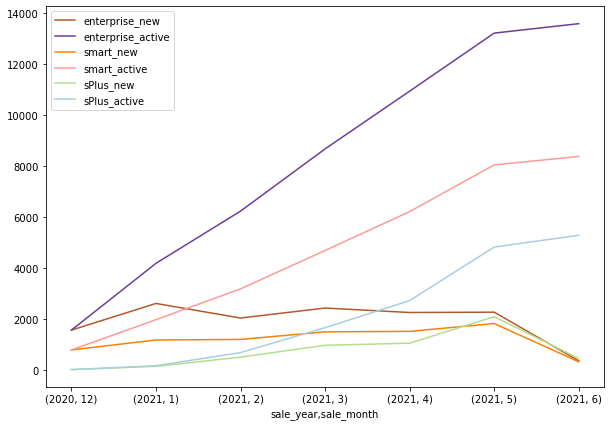

In [237]:
license_df.filter(regex='active$|new$').plot(figsize=(10,7), colormap = 'Paired_r');

The highest number of active subscriptions correspond to enterprise licenses,  
followed by smart and finally by smart plus.  
(percentages of total subscriptions??? donut)

## Billing Period - done by definiton

In [240]:
period_df = subs.pivot_table(index=['sale_year','sale_month'],
                 columns= ['billing_period','operation_type'],
                 values = ['billing_plan_price'],
                 aggfunc = 'count')

period_df.columns=['month_cancel', 'month_purch', 
                    'trial_cancel', 
                    'year_cancel', 'year_purch']

# period_df.reset_index(drop=True, inplace= True)

period_df

month_cancel  month_purch  trial_cancel  year_cancel  \
sale_year sale_month                                                         
2020      12                   555         2397           619          199   
2021      1                    917         4232           998          126   
          2                    832         4023           765          175   
          3                   1049         5257           616          237   
          4                   1222         5613           562          234   
          5                   1387         7143           367          190   
          6                    235         1310            49           15   

                      year_purch  
sale_year sale_month              
2020      12                 752  
2021      1                  770  
          2                  752  
          3                  951  
          4                  692  
          5                  642  
          6                  105

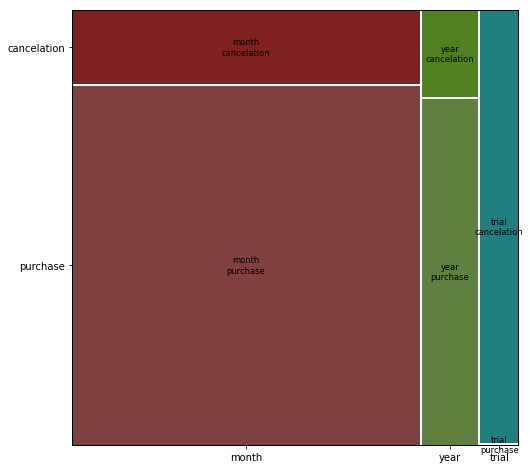

In [241]:
f, ax = plt.subplots(figsize=(8,8))
mosaic(subs, ['billing_period','operation_type'], ax = ax)
plt.show()

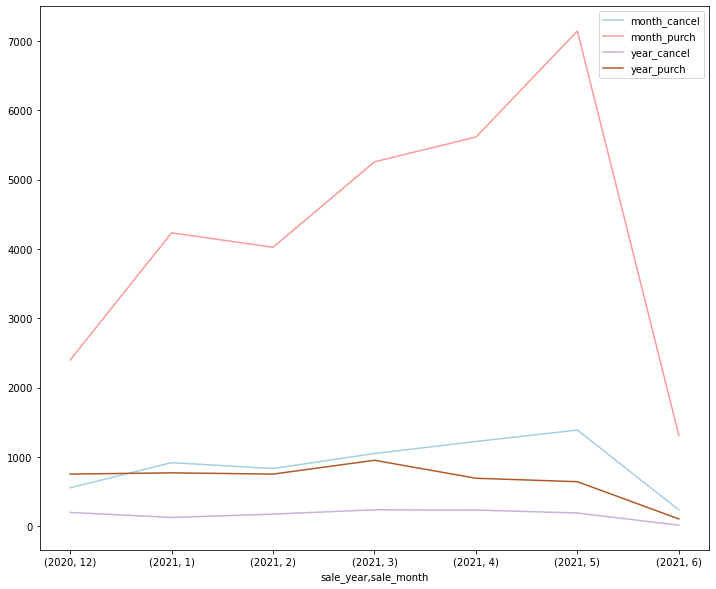

In [246]:
period_df.drop(columns='trial_cancel').plot(figsize=(12,10), colormap = 'Paired'); #subplots = True, 

Most of the subscriptions increase happen within monthly billing period.

### New and active

In [247]:
period_df['month_new'] = period_df.month_purch-period_df.month_cancel
period_df['month_active'] = period_df.month_new.cumsum()

period_df['year_new'] = period_df.year_purch-period_df.year_cancel
period_df['year_active'] = period_df.year_new.cumsum()

period_df

month_cancel  month_purch  trial_cancel  year_cancel  \
sale_year sale_month                                                         
2020      12                   555         2397           619          199   
2021      1                    917         4232           998          126   
          2                    832         4023           765          175   
          3                   1049         5257           616          237   
          4                   1222         5613           562          234   
          5                   1387         7143           367          190   
          6                    235         1310            49           15   

                      year_purch  month_new  month_active  year_new  \
sale_year sale_month                                                  
2020      12                 752       1842          1842       553   
2021      1                  770       3315          5157       644   
          2                  752       3191          8348       577   
          3                  951       4208         12556       714   
          4                  692       4391         16947       458   
          5                  642       5756         22703       452   
          6                  105       1075         23778        90   

                      year_active  
sale_year sale_month               
2020      12                  553  
2021      1                  1197  
          2                  1774  
          3                  2488  
          4                  2946  
          5                  3398  
          6                  3488

In [248]:
period_df.filter(regex='active$|new$')

month_new  month_active  year_new  year_active
sale_year sale_month                                                
2020      12               1842          1842       553          553
2021      1                3315          5157       644         1197
          2                3191          8348       577         1774
          3                4208         12556       714         2488
          4                4391         16947       458         2946
          5                5756         22703       452         3398
          6                1075         23778        90         3488

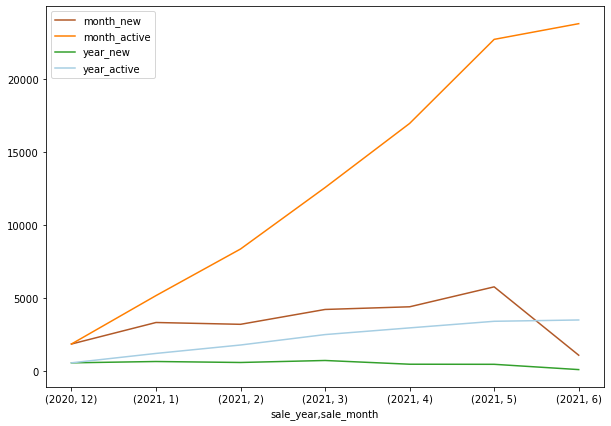

In [249]:
period_df.filter(regex='active$|new$').plot(figsize=(10,7), colormap = 'Paired_r');

# Revenue dynamics

In [486]:
# Group
mrr2= subs[subs.billing_period != 'trial'].groupby(['sale_year',
                                                    'sale_month',
                                                    'operation_type']).agg({'billing_plan_price':['count','sum']})

mrr2.columns = ['n','amount']
mrr2.reset_index(inplace=True)

mrr2


,sale_year,sale_month,operation_type,n,amount
0,2020,12,cancelation,754,9249.89
1,2020,12,purchase,3149,37941.85
2,2021,1,cancelation,1043,10981.33
3,2021,1,purchase,5002,55016.06
4,2021,2,cancelation,1007,11370.16
5,2021,2,purchase,4775,51763.50
6,2021,3,cancelation,1286,14436.17
7,2021,3,purchase,6208,65796.00
8,2021,4,cancelation,1456,15660.39
9,2021,4,purchase,6305,62381.18


In [487]:
# Pivot
mrr2 = mrr2.pivot(index=['sale_year','sale_month'],
                  columns='operation_type',
                  values = ['n','amount'])

mrr2.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount']

mrr2.reset_index(inplace=True)

mrr2

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount
0,2020,12,754.0,3149.0,9249.89,37941.85
1,2021,1,1043.0,5002.0,10981.33,55016.06
2,2021,2,1007.0,4775.0,11370.16,51763.50
3,2021,3,1286.0,6208.0,14436.17,65796.00
4,2021,4,1456.0,6305.0,15660.39,62381.18
5,2021,5,1577.0,7785.0,16068.00,72896.75
6,2021,6,250.0,1415.0,2365.99,12953.17


## Initial Approach - not accurate

In [344]:
# General Revenue Dynamics
# mrr -> monthly recurring revenue
mrr = subs[subs.operation_type != 'cancelation'].groupby(['sale_year','sale_month']).agg({'billing_plan_price':'sum'})

# mrr.reset_index(inplace=True)
mrr.rename(columns={'billing_plan_price':'purchase'}, inplace=True)

mrr

purchase
sale_year sale_month          
2020      12          37941.85
2021      1           55016.06
          2           51763.50
          3           65796.00
          4           62381.18
          5           72896.75
          6           12953.17

In [349]:
mrr_cancelation = subs[(subs.billing_period != 'trial') & (subs.operation_type == 'cancelation')].groupby(['sale_year','sale_month']).agg({'billing_plan_price':'sum'})

mrr_cancelation.rename(columns={'billing_plan_price':'cancelation'}, inplace=True)

mrr_cancelation


cancelation
sale_year sale_month             
2020      12              9249.89
2021      1              10981.33
          2              11370.16
          3              14436.17
          4              15660.39
          5              16068.00
          6               2365.99

In [350]:
mrr['cancelation'] = mrr_cancelation.cancelation
mrr['mrr'] = mrr.purchase-mrr.cancelation
mrr

purchase  cancelation       mrr
sale_year sale_month                                 
2020      12          37941.85      9249.89  28691.96
2021      1           55016.06     10981.33  44034.73
          2           51763.50     11370.16  40393.34
          3           65796.00     14436.17  51359.83
          4           62381.18     15660.39  46720.79
          5           72896.75     16068.00  56828.75
          6           12953.17      2365.99  10587.18

In [351]:
mrr.sum()

purchase       358748.51
cancelation     80131.93
mrr            278616.58
dtype: float64

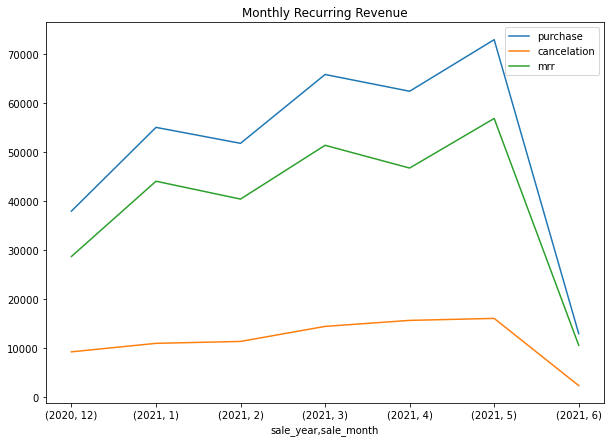

In [353]:
#sns.lineplot(x=,y='mrr', data=mrr);
#AttributeError: 'MultiIndex' object has no attribute '_data'

mrr.plot(figsize=(10,7), title = 'Monthly Recurring Revenue');

## Revenue Dynamics by license

In [ ]:
# monthly revenue by license_name

In [515]:
revenue_l_m = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                               index=['sale_year',
                                                                      'sale_month',
                                                                      #'license_id',
                                                                      'license_name'],
                                                               columns = 'operation_type',
                                                               aggfunc= {'license_id':pd.Series.nunique,
                                                                         'billing_plan_price':['count','sum']}, 
                                                               fill_value = 0) #,
                                                                # margins=True)

revenue_l_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

revenue_l_m['freq'] = revenue_l_m.n_purch-revenue_l_m.n_cancel
revenue_l_m['revenue'] = revenue_l_m.purch_amount-revenue_l_m.cancel_amount

# revenue_l_m.reset_index(inplace=True)

revenue_l_m

n_cancel  n_purch  cancel_amount  \
sale_year sale_month license_name                                     
2020      12         enterprise         494     2068        6454.10   
                     smart              191      987        2084.48   
                     smart plus          69       94         711.31   
2021      1          enterprise         759     3378        8959.41   
                     smart              228     1415        1336.48   
                     smart plus          56      209         685.44   
          2          enterprise         695     2742        8633.05   
                     smart              224     1432        1826.99   
                     smart plus          88      601         910.12   
          3          enterprise         753     3192        9470.47   
                     smart              303     1808        2695.00   
                     smart plus         230     1208        2270.70   
          4          enterprise         748     3012        9389.52   
                     smart              347     1871        2808.48   
                     smart plus         361     1422        3462.39   
          5          enterprise         671     2948        8242.29   
                     smart              378     2209        2952.99   
                     smart plus         528     2628        4872.72   
          6          enterprise          98      468        1133.02   
                     smart               49      382         279.00   
                     smart plus         103      565         953.97   

                                   purch_amount  cancel_cust  purch_cust  \
sale_year sale_month license_name                                          
2020      12         enterprise        25722.36          492        2059   
                     smart             10927.42          190         974   
                     smart plus         1292.07           17          92   
2021      1          enterprise        40263.23          758        3210   
                     smart             12285.92          226        1352   
                     smart plus         2466.91           39         201   
          2          enterprise        32412.59          686        2735   
                     smart             12953.92          215        1419   
                     smart plus         6396.99           78         594   
          3          enterprise        38299.09          747        3125   
                     smart             15243.99          291        1755   
                     smart plus        12252.92          211        1162   
          4          enterprise        35711.90          736        2994   
                     smart             12905.50          333        1841   
                     smart plus        13763.78          333        1368   
          5          enterprise        34096.53          659        2901   
                     smart             13830.50          375        2170   
                     smart plus        24969.72          527        2592   
          6          enterprise         5466.32           98         468   
                     smart              2197.50           49         381   
                     smart plus         5289.35          103         563   

                                   freq   revenue  
sale_year sale_month license_name                  
2020      12         enterprise    1574  19268.26  
                     smart          796   8842.94  
                     smart plus      25    580.76  
2021      1          enterprise    2619  31303.82  
                     smart         1187  10949.44  
                     smart plus     153   1781.47  
          2          enterprise    2047  23779.54  
                     smart         1208  11126.93  
                     smart plus     513   5486.87  
          3          enterprise    2439  28828.62  
                     smart  

## Revenue dynamics

In [ ]:
# Revenue by month

In [524]:
revenue_m = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                               index=['sale_year',
                                                                      'sale_month'],
                                                                      #'license_id',
                                                                      #'license_name'],
                                                               columns = 'operation_type',
                                                               aggfunc= {'license_id':pd.Series.nunique,
                                                                         'billing_plan_price':['count','sum']}, 
                                                               fill_value = 0) #,
                                                                # margins=True)

revenue_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

revenue_m['freq'] = revenue_m.n_purch-revenue_m.n_cancel
revenue_m['revenue'] = revenue_m.purch_amount-revenue_m.cancel_amount

# revenue_m.reset_index(inplace=True)

revenue_m

n_cancel  n_purch  cancel_amount  purch_amount  \
sale_year sale_month                                                   
2020      12               754     3149        9249.89      37941.85   
2021      1               1043     5002       10981.33      55016.06   
          2               1007     4775       11370.16      51763.50   
          3               1286     6208       14436.17      65796.00   
          4               1456     6305       15660.39      62381.18   
          5               1577     7785       16068.00      72896.75   
          6                250     1415        2365.99      12953.17   

                      cancel_cust  purch_cust  freq   revenue  
sale_year sale_month                                           
2020      12                  695        3118  2395  28691.96  
2021      1                  1018        4750  3959  44034.73  
          2                   968        4727  3768  40393.34  
          3                  1242        6029  4922  51359.83  
          4                  1387        6184  4849  46720.79  
          5                  1558        7625  6208  56828.75  
          6                   249        1410  1165  10587.18

### kpis

In [561]:
# Average Revenue Per Acount
revenue_m['arpa'] = round(revenue_m.revenue/revenue_m.purch_cust,4)
# Purchase Frequency Rate
revenue_m['pfr'] = round(revenue_m.freq/revenue_m.purch_cust,4)
# Average Order Value
revenue_m['aov'] = round(revenue_m.revenue/revenue_m.freq,4)
# Customer Value == Average Revenue Per Account
# revenue_m['cv'] = round(revenue_m.pfr * revenue_m.aov,2)
# Churn Rate
revenue_m['mcr'] = mcr2.mcr.tolist() # !!!
# Average Customer Lifespan
revenue_m['acl'] = 1/revenue_m.mcr
# Lifetime Value
revenue_m['ltv'] = revenue_m.arpa * revenue_m.acl

revenue_m

n_cancel  n_purch  cancel_amount  purch_amount  \
sale_year sale_month                                                   
2020      12               754     3149        9249.89      37941.85   
2021      1               1043     5002       10981.33      55016.06   
          2               1007     4775       11370.16      51763.50   
          3               1286     6208       14436.17      65796.00   
          4               1456     6305       15660.39      62381.18   
          5               1577     7785       16068.00      72896.75   
          6                250     1415        2365.99      12953.17   

                      cancel_cust  purch_cust  freq   revenue    arpa     pfr  \
sale_year sale_month                                                            
2020      12                  695        3118  2395  28691.96  9.2020  0.7681   
2021      1                  1018        4750  3959  44034.73  9.2705  0.8335   
          2                   968        4727  3768  40393.34  8.5452  0.7971   
          3                  1242        6029  4922  51359.83  8.5188  0.8164   
          4                  1387        6184  4849  46720.79  7.5551  0.7841   
          5                  1558        7625  6208  56828.75  7.4530  0.8142   
          6                   249        1410  1165  10587.18  7.5086  0.8262   

                          aov     mcr        acl         ltv  
sale_year sale_month                                          
2020      12          11.9799  1.0000   1.000000    9.202000  
2021      1           11.1227  0.4355   2.296211   21.287026  
          2           10.7201  0.2232   4.480287   38.284946  
          3           10.4347  0.2590   3.861004   32.891120  
          4            9.6351  0.2174   4.599816   34.752070  
          5            9.1541  0.2149   4.653327   34.681247  
          6            9.0877  0.0273  36.630037  275.040293

In [598]:
acl = revenue_m.acl[2:-1].mean()
acl

4.398608433902996

## Further Metrics

In [637]:
revenue_m2 = revenue_m.reset_index()
revenue_m2

,sale_year,sale_month,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue,arpa,pfr,aov,mcr,acl,ltv
0,2020,12,754,3149,9249.89,37941.85,695,3118,2395,28691.96,9.2020,0.7681,11.9799,1.0000,1.000000,9.202000
1,2021,1,1043,5002,10981.33,55016.06,1018,4750,3959,44034.73,9.2705,0.8335,11.1227,0.4355,2.296211,21.287026
2,2021,2,1007,4775,11370.16,51763.50,968,4727,3768,40393.34,8.5452,0.7971,10.7201,0.2232,4.480287,38.284946
3,2021,3,1286,6208,14436.17,65796.00,1242,6029,4922,51359.83,8.5188,0.8164,10.4347,0.2590,3.861004,32.891120
4,2021,4,1456,6305,15660.39,62381.18,1387,6184,4849,46720.79,7.5551,0.7841,9.6351,0.2174,4.599816,34.752070
5,2021,5,1577,7785,16068.00,72896.75,1558,7625,6208,56828.75,7.4530,0.8142,9.1541,0.2149,4.653327,34.681247
6,2021,6,250,1415,2365.99,12953.17,249,1410,1165,10587.18,7.5086,0.8262,9.0877,0.0273,36.630037,275.040293


In [647]:
# Month over Month Growth

MoM = []

for i in range(len(revenue_m2)):
    if i == 0:
        MoM.append(0)
    else:
        x = (revenue_m2.revenue[i]-revenue_m2.revenue[i-1])/revenue_m2.revenue[i-1]
        MoM.append(round(100*x,2))
        
MoM

[0, 53.47, -8.27, 27.15, -9.03, 21.63, -81.37]

In [644]:
revenue_m['mom'] = list(map(lambda x: str(x) + '%', MoM))
revenue_m

n_cancel  n_purch  cancel_amount  purch_amount  \
sale_year sale_month                                                   
2020      12               754     3149        9249.89      37941.85   
2021      1               1043     5002       10981.33      55016.06   
          2               1007     4775       11370.16      51763.50   
          3               1286     6208       14436.17      65796.00   
          4               1456     6305       15660.39      62381.18   
          5               1577     7785       16068.00      72896.75   
          6                250     1415        2365.99      12953.17   

                      cancel_cust  purch_cust  freq   revenue    arpa     pfr  \
sale_year sale_month                                                            
2020      12                  695        3118  2395  28691.96  9.2020  0.7681   
2021      1                  1018        4750  3959  44034.73  9.2705  0.8335   
          2                   968        4727  3768  40393.34  8.5452  0.7971   
          3                  1242        6029  4922  51359.83  8.5188  0.8164   
          4                  1387        6184  4849  46720.79  7.5551  0.7841   
          5                  1558        7625  6208  56828.75  7.4530  0.8142   
          6                   249        1410  1165  10587.18  7.5086  0.8262   

                          aov     mcr        acl         ltv      mom  
sale_year sale_month                                                   
2020      12          11.9799  1.0000   1.000000    9.202000       0%  
2021      1           11.1227  0.4355   2.296211   21.287026   53.47%  
          2           10.7201  0.2232   4.480287   38.284946   -8.27%  
          3           10.4347  0.2590   3.861004   32.891120   27.15%  
          4            9.6351  0.2174   4.599816   34.752070   -9.03%  
          5            9.1541  0.2149   4.653327   34.681247   21.63%  
          6            9.0877  0.0273  36.630037  275.040293  -81.37%

In [645]:
# net profit
revenue_m['net'] = revenue_m.revenue*0.4
revenue_m

n_cancel  n_purch  cancel_amount  purch_amount  \
sale_year sale_month                                                   
2020      12               754     3149        9249.89      37941.85   
2021      1               1043     5002       10981.33      55016.06   
          2               1007     4775       11370.16      51763.50   
          3               1286     6208       14436.17      65796.00   
          4               1456     6305       15660.39      62381.18   
          5               1577     7785       16068.00      72896.75   
          6                250     1415        2365.99      12953.17   

                      cancel_cust  purch_cust  freq   revenue    arpa     pfr  \
sale_year sale_month                                                            
2020      12                  695        3118  2395  28691.96  9.2020  0.7681   
2021      1                  1018        4750  3959  44034.73  9.2705  0.8335   
          2                   968        4727  3768  40393.34  8.5452  0.7971   
          3                  1242        6029  4922  51359.83  8.5188  0.8164   
          4                  1387        6184  4849  46720.79  7.5551  0.7841   
          5                  1558        7625  6208  56828.75  7.4530  0.8142   
          6                   249        1410  1165  10587.18  7.5086  0.8262   

                          aov     mcr        acl         ltv      mom  \
sale_year sale_month                                                    
2020      12          11.9799  1.0000   1.000000    9.202000       0%   
2021      1           11.1227  0.4355   2.296211   21.287026   53.47%   
          2           10.7201  0.2232   4.480287   38.284946   -8.27%   
          3           10.4347  0.2590   3.861004   32.891120   27.15%   
          4            9.6351  0.2174   4.599816   34.752070   -9.03%   
          5            9.1541  0.2149   4.653327   34.681247   21.63%   
          6            9.0877  0.0273  36.630037  275.040293  -81.37%   

                            net  
sale_year sale_month             
2020      12          11476.784  
2021      1           17613.892  
          2           16157.336  
          3           20543.932  
          4           18688.316  
          5           22731.500  
          6            4234.872

In [648]:
# Gross Churn Rate

gcr = []

for i in range(len(revenue_m2)):
    if i == 0:
        gcr.append(0)
    else:
        x = revenue_m2.cancel_amount[i]/revenue_m2.revenue[i-1]
        gcr.append(round(100*x,2))
        
gcr


[0, 38.27, 25.82, 35.74, 30.49, 34.39, 4.16]

In [651]:
revenue_m['gcr'] = list(map(lambda x: str(x) + '%', gcr))
revenue_m

n_cancel  n_purch  cancel_amount  purch_amount  \
sale_year sale_month                                                   
2020      12               754     3149        9249.89      37941.85   
2021      1               1043     5002       10981.33      55016.06   
          2               1007     4775       11370.16      51763.50   
          3               1286     6208       14436.17      65796.00   
          4               1456     6305       15660.39      62381.18   
          5               1577     7785       16068.00      72896.75   
          6                250     1415        2365.99      12953.17   

                      cancel_cust  purch_cust  freq   revenue    arpa     pfr  \
sale_year sale_month                                                            
2020      12                  695        3118  2395  28691.96  9.2020  0.7681   
2021      1                  1018        4750  3959  44034.73  9.2705  0.8335   
          2                   968        4727  3768  40393.34  8.5452  0.7971   
          3                  1242        6029  4922  51359.83  8.5188  0.8164   
          4                  1387        6184  4849  46720.79  7.5551  0.7841   
          5                  1558        7625  6208  56828.75  7.4530  0.8142   
          6                   249        1410  1165  10587.18  7.5086  0.8262   

                          aov     mcr        acl         ltv      mom  \
sale_year sale_month                                                    
2020      12          11.9799  1.0000   1.000000    9.202000       0%   
2021      1           11.1227  0.4355   2.296211   21.287026   53.47%   
          2           10.7201  0.2232   4.480287   38.284946   -8.27%   
          3           10.4347  0.2590   3.861004   32.891120   27.15%   
          4            9.6351  0.2174   4.599816   34.752070   -9.03%   
          5            9.1541  0.2149   4.653327   34.681247   21.63%   
          6            9.0877  0.0273  36.630037  275.040293  -81.37%   

                            net     gcr  
sale_year sale_month                     
2020      12          11476.784      0%  
2021      1           17613.892  38.27%  
          2           16157.336  25.82%  
          3           20543.932  35.74%  
          4           18688.316  30.49%  
          5           22731.500  34.39%  
          6            4234.872   4.16%

# Churn Rate - replaced above

In [ ]:
# Monthly Churn Rate
# mcr 

In [268]:
active

,sale_year,sale_month,cancelation,purchase,new,active
0,2020,12,754,3149,2395,2395
1,2021,1,1043,5002,3959,6354
2,2021,2,1007,4775,3768,10122
3,2021,3,1286,6208,4922,15044
4,2021,4,1456,6305,4849,19893
5,2021,5,1577,7785,6208,26101
6,2021,6,250,1415,1165,27266


In [274]:
mcr = []
for i in range(len(active)):
    if i == 0:
        mcr.append(np.nan)
    else:
        x = active.cancelation[i]/active.active[i-1]
        mcr.append(round(x,4)*100)
mcr

[nan, 43.55, 15.85, 12.7, 9.68, 7.93, 0.96]

/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_2007/3927437971.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['dec','jan','feb','mar','apr','may','jun'])


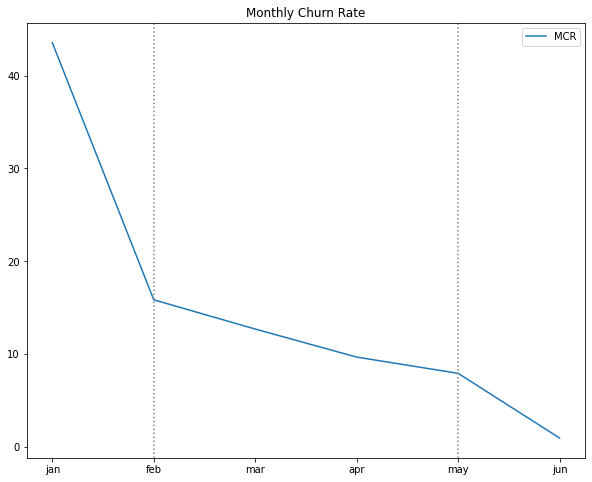

In [295]:
# sns.lineplot(x=mrr.index, y=mcr);
#AttributeError: 'MultiIndex' object has no attribute '_data'

f, ax = plt.subplots(figsize=(10,8))
ax.plot(mcr, label='MCR')
ax.legend()
ax.set_title('Monthly Churn Rate')
ax.axvline(x=2, linestyle=':', color='gray')
ax.axvline(x=5, linestyle=':', color='gray')
ax.set_xticklabels(['dec','jan','feb','mar','apr','may','jun'])
plt.show()

The Monthly Churn Rate is slowly decreasing from 15.85% in february (when whole month data is available) to 7.93% in may.

In [376]:
# Average Churn Rate
churnRate = sum(mcr[2:-1])/len(mcr[2:-1])
churnRate

11.54

# Customers - license_id

In [309]:
subs.head(10)

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
0,2021-04-16 11:47:00,68373,511,purchase,month,enterprise,10.99,4,2021
1,2021-05-16 12:01:00,68373,511,purchase,month,enterprise,10.99,5,2021
2,2021-05-04 15:15:00,29867,515,purchase,month,smart plus,8.99,5,2021
3,2021-05-31 05:24:00,29867,511,purchase,month,enterprise,10.99,5,2021
4,2021-03-21 08:29:00,63044,456,purchase,year,smart,25.00,3,2021
5,2020-12-30 16:01:00,30688,497,purchase,month,enterprise,10.99,12,2020
6,2021-01-27 17:01:00,30688,497,purchase,month,enterprise,10.99,1,2021
7,2021-02-27 17:01:00,30688,497,purchase,month,enterprise,10.99,2,2021
8,2021-03-29 18:01:00,30688,497,purchase,month,enterprise,10.99,3,2021
9,2021-04-29 22:02:00,30688,497,cancelation,month,enterprise,10.99,4,2021


## by expenditure - own purpose

In [472]:
# Group
customer_revenue = subs[subs.billing_period != 'trial'].groupby(['license_id',
                                                                 'operation_type']).agg({'billing_plan_price':['count','sum']})

customer_revenue.columns = ['n','amount']
customer_revenue.reset_index(inplace=True)

customer_revenue


,license_id,operation_type,n,amount
0,2971,cancelation,5,49.98
1,2971,purchase,23,123.96
2,2975,purchase,1,18.99
3,2979,cancelation,1,10.99
4,2979,purchase,2,21.98
...,...,...,...,...
23133,76542,purchase,1,8.99
23134,76543,purchase,1,8.99
23135,76544,purchase,1,8.99
23136,76545,purchase,1,8.99


In [474]:
# Pivot
customer_revenue = customer_revenue.pivot(index=['license_id'],
                                          columns='operation_type', 
                                          values = ['n','amount'])

customer_revenue.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount']

customer_revenue.reset_index(inplace=True)

customer_revenue

,license_id,n_cancel,n_purch,cancel_amount,purch_amount
0,2971,5.0,23.0,49.98,123.96
1,2975,NaN,1.0,NaN,18.99
2,2979,1.0,2.0,10.99,21.98
3,3012,NaN,6.0,NaN,71.94
4,3029,1.0,NaN,10.99,NaN
...,...,...,...,...,...
17680,76542,NaN,1.0,NaN,8.99
17681,76543,NaN,1.0,NaN,8.99
17682,76544,NaN,1.0,NaN,8.99
17683,76545,NaN,1.0,NaN,8.99


In [475]:
customer_revenue.fillna(0, inplace=True)
customer_revenue['freq'] = customer_revenue.n_purch-customer_revenue.n_cancel
customer_revenue['revenue'] = customer_revenue.purch_amount-customer_revenue.cancel_amount
customer_revenue

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
0,2971,5.0,23.0,49.98,123.96,18.0,73.98
1,2975,0.0,1.0,0.00,18.99,1.0,18.99
2,2979,1.0,2.0,10.99,21.98,1.0,10.99
3,3012,0.0,6.0,0.00,71.94,6.0,71.94
4,3029,1.0,0.0,10.99,0.00,-1.0,-10.99
...,...,...,...,...,...,...,...
17680,76542,0.0,1.0,0.00,8.99,1.0,8.99
17681,76543,0.0,1.0,0.00,8.99,1.0,8.99
17682,76544,0.0,1.0,0.00,8.99,1.0,8.99
17683,76545,0.0,1.0,0.00,8.99,1.0,8.99


## Key customers 2

In [477]:
customer_revenue[customer_revenue.freq == customer_revenue.freq.max()]

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
10586,57679,23.0,50.0,412.82,637.09,27.0,224.27


In [478]:
customer_revenue[customer_revenue.revenue == customer_revenue.revenue.max()]

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
371,4410,0.0,6.0,0.0,720.0,6.0,720.0


In [481]:
customer_revenue[customer_revenue.revenue == customer_revenue.revenue.min()]

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
1896,14882,65.0,6.0,772.9,55.48,-59.0,-717.42


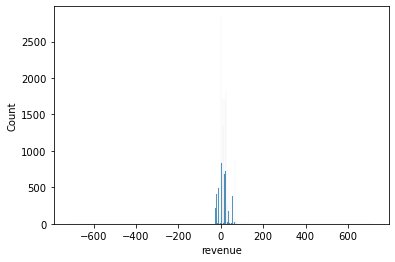

In [480]:
sns.histplot(data = customer_revenue, x='revenue');

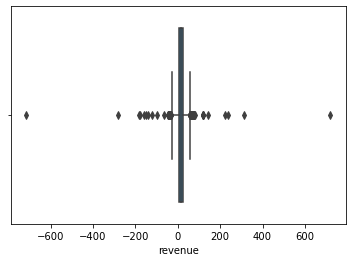

In [483]:
sns.boxplot(x=customer_revenue.revenue);

In [488]:
customer_revenue.describe()

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
count,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000,17685.000000
mean,49296.351654,0.416907,1.958666,4.531068,20.285468,1.541759,15.754401
std,20885.701884,0.835657,1.754962,10.517864,18.410065,1.943857,21.182324
min,2971.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,-717.420000
25%,36506.000000,0.000000,1.000000,0.000000,8.990000,1.000000,3.500000
50%,53067.000000,0.000000,1.000000,0.000000,17.980000,1.000000,14.000000
75%,66703.000000,1.000000,2.000000,10.990000,25.000000,2.000000,25.000000
max,76549.000000,65.000000,50.000000,772.900000,720.000000,27.000000,720.000000


In [489]:
customer_revenue.revenue.skew()

0.2897242254019901

### Positive Revenue Customers 

In [595]:
labels_positive = ['Standard','Preferred','VIP']
quantiles_positive = pd.qcut(customer_revenue.revenue[customer_revenue.revenue > 0], [0,0.8,0.95,1], labels=labels_positive, retbins=True) #
quantiles_positive


(0             VIP
 1        Standard
 2        Standard
 3             VIP
 6        Standard
            ...   
 17680    Standard
 17681    Standard
 17682    Standard
 17683    Standard
 17684    Standard
 Name: revenue, Length: 13402, dtype: category
 Categories (3, object): ['Standard' < 'Preferred' < 'VIP'],
 array([  1.  ,  26.97,  65.94, 720.  ]))

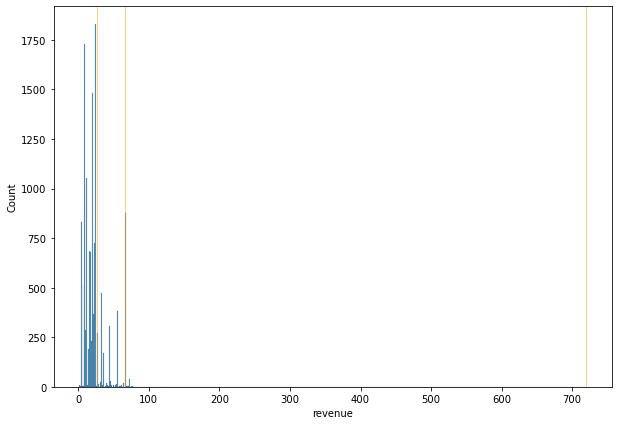

In [603]:
f, ax = plt.subplots(figsize=(10,7))
for x in quantiles_positive[1][1:]:
    plt.axvline(x, color = 'orange', linewidth=0.5)
sns.histplot(data = customer_revenue[customer_revenue.revenue > 0], x='revenue')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12,8))
for x in quantiles[1][1:]:
    plt.axvline(x, color = 'orange', linewidth=0.5)
sns.histplot(data = customers, x='expend') #, kde=True)
plt.show()

### Majority of customers' revenue per month

In [604]:
pack_boundary = quantiles_positive[1][1]/acl
pack_boundary

6.131484628666717

## Initial Active Subscriptions

In [573]:
customer_revenue[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)]

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
4,3029,1.0,0.0,10.99,0.0,-1.0,-10.99
5,3050,1.0,0.0,19.99,0.0,-1.0,-19.99
8,3069,1.0,0.0,19.99,0.0,-1.0,-19.99
12,3083,1.0,0.0,18.99,0.0,-1.0,-18.99
36,3169,1.0,0.0,18.99,0.0,-1.0,-18.99
...,...,...,...,...,...,...,...
10922,58897,1.0,0.0,3.99,0.0,-1.0,-3.99
11862,62153,1.0,0.0,15.99,0.0,-1.0,-15.99
13268,66715,1.0,0.0,15.99,0.0,-1.0,-15.99
13656,67959,1.0,0.0,4.00,0.0,-1.0,-4.00


In [580]:
subscriptions0 = len(customer_revenue[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])
subscriptions0

1359

In [574]:
customer_revenue.n_cancel[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)].value_counts()

1.0    1348
2.0       5
4.0       3
5.0       1
3.0       1
9.0       1
Name: n_cancel, dtype: int64

In [575]:
customer_revenue[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)].describe()

,license_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
count,1359.000000,1359.000000,1359.0,1359.000000,1359.0,1359.000000,1359.000000
mean,24032.125828,1.020603,0.0,16.315548,0.0,-1.020603,-16.315548
std,15061.790568,0.291539,0.0,8.326441,0.0,0.291539,8.326441
min,3029.000000,1.000000,0.0,3.500000,0.0,-9.000000,-159.920000
25%,10574.500000,1.000000,0.0,10.990000,0.0,-1.000000,-19.990000
50%,20737.000000,1.000000,0.0,18.990000,0.0,-1.000000,-18.990000
75%,39203.500000,1.000000,0.0,19.990000,0.0,-1.000000,-10.990000
max,70428.000000,9.000000,0.0,159.920000,0.0,-1.000000,-3.500000


In [582]:
# Check the dynamics of the cancelations
subs[subs.license_id.isin(customer_revenue.license_id[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])].sort_values('sale_date')



,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
44904,2020-12-13 09:27:00,47006,509,cancelation,month,enterprise,10.99,12,2020
34259,2020-12-13 23:00:00,38633,497,cancelation,month,enterprise,10.99,12,2020
37018,2020-12-13 23:00:00,33061,499,cancelation,month,enterprise,10.99,12,2020
45693,2020-12-13 23:00:00,33065,497,cancelation,month,enterprise,10.99,12,2020
42769,2020-12-13 23:00:00,42571,441,cancelation,month,smart,3.50,12,2020
...,...,...,...,...,...,...,...,...,...
25855,2021-06-03 22:02:00,24627,442,cancelation,year,smart,25.00,6,2021
45471,2021-06-04 22:01:00,24655,498,cancelation,year,enterprise,19.99,6,2021
18071,2021-06-05 22:02:00,24694,442,cancelation,year,smart,25.00,6,2021
44312,2021-06-05 22:02:00,22386,512,cancelation,year,enterprise,19.99,6,2021


In [583]:
# Doublecheck the operation_type of the cancelations 
subs.operation_type[subs.license_id.isin(customer_revenue.license_id[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])].value_counts()



cancelation    1390
Name: operation_type, dtype: int64

In [ ]:
# ??? How can be cancelled a monthly subscription in june that has never been bought before?

In [584]:
subs[subs.license_id == 58509]

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
43459,2021-03-05 11:02:00,58509,521,cancelation,year,smart plus,15.99,3,2021
43460,2021-03-22 07:56:00,58509,475,cancelation,trial,trial smart,0.00,3,2021
43461,2021-04-18 08:09:00,58509,529,cancelation,month,smart,4.00,4,2021
43462,2021-05-27 14:44:00,58509,441,cancelation,month,smart,3.50,5,2021
43463,2021-06-06 09:11:00,58509,591,cancelation,month,enterprise,12.99,6,2021


In [585]:
# Check the billing perid of the cancelations
subs.billing_period[subs.license_id.isin(customer_revenue.license_id[(customer_revenue.revenue < 0) & (customer_revenue.n_purch == 0)])].value_counts()



year     764
month    623
trial      3
Name: billing_period, dtype: int64

## Initial approach - without cancellation

In [313]:
customers = subs[subs.operation_type != 'cancelation'].groupby('license_id').agg({'billing_plan_price':['count','sum'],
                                #'billing_plan_price':'sum',
                                'license_name':pd.Series.nunique,
                                'license_plan_id':pd.Series.nunique})

customers.columns = ['n_purch', 'purchase', 'n_license', 'n_plan_id']

customers.reset_index(inplace=True)

customers

,license_id,n_purch,expend,n_license,n_plan
0,2971,23,123.96,2,7
1,2975,1,18.99,1,1
2,2979,2,21.98,1,1
3,3012,6,71.94,1,2
4,3053,1,19.99,1,1
...,...,...,...,...,...
16321,76542,1,8.99,1,1
16322,76543,1,8.99,1,1
16323,76544,1,8.99,1,1
16324,76545,1,8.99,1,1


In [316]:
customers.describe()

,license_id,n_purch,expend,n_license,n_plan
count,16326.00000,16326.000000,16326.000000,16326.000000,16326.000000
mean,51399.38258,2.121708,21.974060,1.019539,1.028911
std,19902.18103,1.729258,18.166942,0.142772,0.208892
min,2971.00000,1.000000,3.500000,1.000000,1.000000
25%,40690.00000,1.000000,10.500000,1.000000,1.000000
50%,54839.00000,1.000000,19.990000,1.000000,1.000000
75%,67749.75000,3.000000,25.000000,1.000000,1.000000
max,76549.00000,50.000000,720.000000,3.000000,10.000000


In [318]:
labels = ['Standard','Preferred','VIP']
quantiles = pd.qcut(customers.expend, [0,0.75,0.95,1], labels=labels, retbins=True) #
quantiles

(0             VIP
 1        Standard
 2        Standard
 3             VIP
 4        Standard
            ...   
 16321    Standard
 16322    Standard
 16323    Standard
 16324    Standard
 16325    Standard
 Name: expend, Length: 16326, dtype: category
 Categories (3, object): ['Standard' < 'Preferred' < 'VIP'],
 array([  3.5 ,  25.  ,  65.94, 720.  ]))

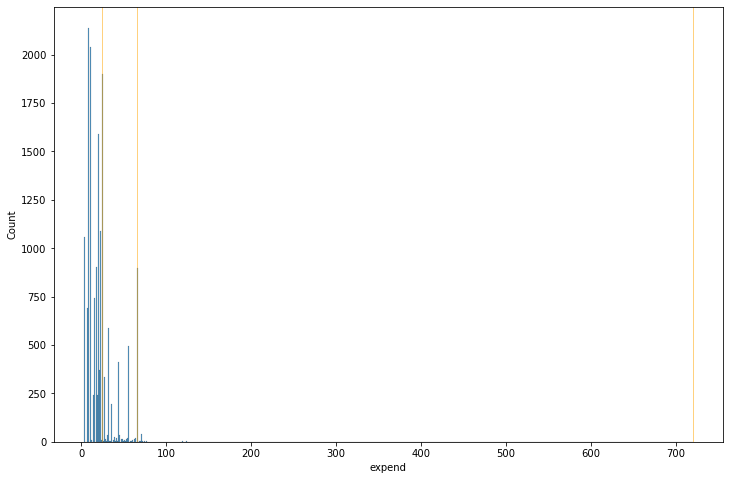

In [319]:
f, ax = plt.subplots(figsize=(12,8))
for x in quantiles[1][1:]:
    plt.axvline(x, color = 'orange', linewidth=0.5)
sns.histplot(data = customers, x='expend') #, kde=True)
plt.show()

In [320]:
quantiles[0].value_counts()

Standard     13025
Preferred     3228
VIP             73
Name: expend, dtype: int64

In [321]:
# Customers who change its license
customers.n_license.value_counts()

1    16017
2      299
3       10
Name: n_license, dtype: int64

## Key Customers - ini

In [336]:
# Largest Customer
customers[customers.expend == 720]

,license_id,n_purch,expend,n_license,n_plan
271,4410,6,720.0,1,2


In [337]:
subs[subs.license_id == 4410]

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
8755,2020-12-24 17:03:00,4410,374,purchase,month,enterprise,120.0,12,2020
8756,2021-01-21 18:03:00,4410,374,purchase,month,enterprise,120.0,1,2021
8757,2021-02-21 18:03:00,4410,374,purchase,month,enterprise,120.0,2,2021
8758,2021-03-23 19:03:00,4410,591,purchase,month,enterprise,120.0,3,2021
8759,2021-04-23 20:03:00,4410,591,purchase,month,enterprise,120.0,4,2021
8760,2021-05-23 21:03:00,4410,591,purchase,month,enterprise,120.0,5,2021


In [338]:
# Most recurrent customer
customers[customers.n_purch == 50]

,license_id,n_purch,expend,n_license,n_plan
9233,57679,50,637.09,3,6


In [370]:
# !!! Do include in revenue all the cancelled purchases

Requisites for cancelation:  
* order by sale date
* license_id, license_plan_id, billing_period, license_name, billing_plan_price are equal
  
!! As an approximation: What if I just subtract the cancelations that are not trial


In [530]:
# subs[(subs.billing_period == 'month') & (subs.operation_type == 'cancelation')]

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
9,2021-04-29 22:02:00,30688,497,cancelation,month,enterprise,10.99,4,2021
41,2021-05-12 22:02:00,67528,497,cancelation,month,enterprise,10.99,5,2021
45,2021-04-28 12:48:00,70278,497,cancelation,month,enterprise,10.99,4,2021
51,2021-05-02 21:52:00,69665,513,cancelation,month,smart plus,8.99,5,2021
59,2021-04-06 22:02:00,32058,497,cancelation,month,enterprise,10.99,4,2021
...,...,...,...,...,...,...,...,...,...
45965,2021-01-12 23:01:00,42537,497,cancelation,month,enterprise,10.99,1,2021
45968,2021-03-14 22:01:00,51221,497,cancelation,month,enterprise,10.99,3,2021
45973,2021-05-08 23:00:00,66576,513,cancelation,month,smart plus,8.99,5,2021
45983,2021-04-18 13:32:00,68182,503,cancelation,month,enterprise,10.99,4,2021


In [531]:
subs[subs.license_id == 57679].sort_values('sale_date').tail(50)

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
15358,2021-04-05 13:58:00,57679,520,purchase,month,smart plus,8.99,4,2021
15359,2021-04-05 13:59:00,57679,528,purchase,year,smart plus,15.99,4,2021
15360,2021-04-05 14:08:00,57679,453,purchase,month,smart,3.50,4,2021
15362,2021-04-05 14:09:00,57679,454,cancelation,year,smart,25.00,4,2021
15361,2021-04-05 14:09:00,57679,454,purchase,year,smart,25.00,4,2021
15363,2021-04-05 14:26:00,57679,520,purchase,month,smart plus,8.99,4,2021
15364,2021-04-05 14:27:00,57679,528,purchase,year,smart plus,15.99,4,2021
15365,2021-04-05 14:27:00,57679,528,cancelation,year,smart plus,15.99,4,2021
15366,2021-04-05 14:32:00,57679,453,purchase,month,smart,3.50,4,2021
15367,2021-04-05 14:33:00,57679,454,purchase,year,smart,25.00,4,2021


In [340]:
subs.operation_type[subs.license_id == 57679].value_counts()

purchase       50
cancelation    23
Name: operation_type, dtype: int64

In [385]:
subs.billing_period[subs.license_id == 57679].value_counts()

year     44
month    29
Name: billing_period, dtype: int64

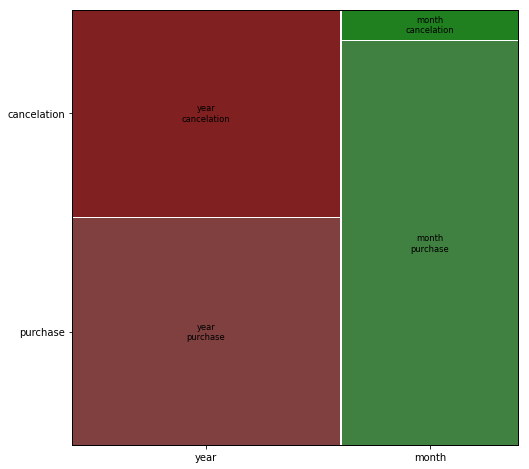

In [387]:
f, ax = plt.subplots(figsize=(8,8))
mosaic(subs[subs.license_id == 57679], ['billing_period','operation_type'], ax = ax)
plt.show()

In [391]:
subs[subs.license_id == 57679].pivot_table(index='operation_type',
                                           columns = 'billing_period',
                                           values= 'license_id',
                                           aggfunc = 'count')

billing_period,month,year
operation_type,,
cancelation,2,21
purchase,27,23


In [490]:
pd.crosstab(subs[subs.license_id == 57679].operation_type, subs[subs.license_id == 57679].billing_period)

billing_period,month,year
operation_type,,
cancelation,2,21
purchase,27,23


## dynamics by license

In [ ]:
# customers by license and month

In [504]:
customer_l_m = subs[subs.billing_period != 'trial'].pivot_table(values = 'billing_plan_price',
                                                                index=['sale_year',
                                                                       'sale_month',
                                                                       'license_id',
                                                                       'license_name'],
                                                                columns = ['operation_type'],
                                                                aggfunc= ['count','sum'],
                                                                fill_value = 0) #,
                                                                # margins=True)

customer_l_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount']

customer_l_m['freq'] = customer_l_m.n_purch-customer_l_m.n_cancel
customer_l_m['revenue'] = customer_l_m.purch_amount-customer_l_m.cancel_amount

# customer_l_m.reset_index(inplace=True)

customer_l_m

n_cancel  n_purch  \
sale_year sale_month license_id license_name                      
2020      12         2971       smart                2        5   
                                smart plus           2        2   
                     2975       enterprise           0        1   
                     2979       enterprise           0        1   
                     3012       enterprise           0        1   
...                                                ...      ...   
2021      6          76542      smart plus           0        1   
                     76543      smart plus           0        1   
                     76544      smart plus           0        1   
                     76545      smart plus           0        1   
                     76549      smart                0        1   

                                              cancel_amount  purch_amount  \
sale_year sale_month license_id license_name                                
2020      12         2971       smart                  7.00         17.50   
                                smart plus            17.98         17.98   
                     2975       enterprise             0.00         18.99   
                     2979       enterprise             0.00         10.99   
                     3012       enterprise             0.00         10.99   
...                                                     ...           ...   
2021      6          76542      smart plus             0.00          8.99   
                     76543      smart plus             0.00          8.99   
                     76544      smart plus             0.00          8.99   
                     76545      smart plus             0.00          8.99   
                     76549      smart                  0.00         25.00   

                                              freq  revenue  
sale_year sale_month license_id license_name                 
2020      12         2971       smart            3    10.50  
                                smart plus       0     0.00  
                     2975       enterprise       1    18.99  
                     2979       enterprise       1    10.99  
                     3012       enterprise       1    10.99  
...                                            ...      ...  
2021      6          76542      smart plus       1     8.99  
                     76543      smart plus       1     8.99  
                     76544      smart plus       1     8.99  
                     76545      smart plus       1     8.99  
                     76549      smart            1    25.00  

[39563 rows x 6 columns]

In [576]:
customer_l_m[customer_l_m.revenue <= 0]

n_cancel  n_purch  \
sale_year sale_month license_id license_name                      
2020      12         2971       smart plus           2        2   
                     3083       enterprise           1        0   
                     3118       enterprise           1        0   
                     3169       enterprise           1        0   
                     3171       smart                1        0   
...                                                ...      ...   
2021      6          76323      smart plus           1        1   
                     76324      smart                1        1   
                     76339      smart plus           1        1   
                     76520      smart plus           1        1   
                     76525      smart plus           1        1   

                                              cancel_amount  purch_amount  \
sale_year sale_month license_id license_name                                
2020      12         2971       smart plus            17.98         17.98   
                     3083       enterprise            18.99          0.00   
                     3118       enterprise            18.99          0.00   
                     3169       enterprise            18.99          0.00   
                     3171       smart                 20.00          0.00   
...                                                     ...           ...   
2021      6          76323      smart plus             8.99          8.99   
                     76324      smart                  3.50          3.50   
                     76339      smart plus             8.99          8.99   
                     76520      smart plus            15.99         15.99   
                     76525      smart plus             8.99          8.99   

                                              freq  revenue  
sale_year sale_month license_id license_name                 
2020      12         2971       smart plus       0     0.00  
                     3083       enterprise      -1   -18.99  
                     3118       enterprise      -1   -18.99  
                     3169       enterprise      -1   -18.99  
                     3171       smart           -1   -20.00  
...                                            ...      ...  
2021      6          76323      smart plus       0     0.00  
                     76324      smart            0     0.00  
                     76339      smart plus       0     0.00  
                     76520      smart plus       0     0.00  
                     76525      smart plus       0     0.00  

[7086 rows x 6 columns]

In [577]:
customer_l_m[customer_l_m.revenue <= 0].describe()

,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
count,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000
mean,1.024414,0.215495,11.097916,2.209551,-0.808919,-8.888364
std,0.380687,0.440686,7.230727,5.112443,0.550521,8.031782
min,1.000000,0.000000,3.500000,0.000000,-22.000000,-239.780000
25%,1.000000,0.000000,8.990000,0.000000,-1.000000,-10.990000
50%,1.000000,0.000000,10.990000,0.000000,-1.000000,-10.990000
75%,1.000000,0.000000,10.990000,0.000000,-1.000000,-3.500000
max,22.000000,9.000000,239.780000,117.500000,4.000000,0.000000


In [578]:

customer_l_m[customer_l_m.freq == 4]

,,,,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
sale_year,sale_month,license_id,license_name,,,,,,
2021,4,57679,smart,5,9,125.0,117.5,4,-7.5


In [579]:
subs[subs.license_id == 57679]

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
15335,2021-02-28 07:25:00,57679,528,purchase,year,smart plus,15.99,2,2021
15336,2021-02-28 07:48:00,57679,528,cancelation,year,smart plus,15.99,2,2021
15337,2021-02-28 07:58:00,57679,520,purchase,month,smart plus,8.99,2,2021
15338,2021-02-28 08:02:00,57679,520,cancelation,month,smart plus,8.99,2,2021
15339,2021-02-28 08:07:00,57679,510,purchase,year,enterprise,19.99,2,2021
...,...,...,...,...,...,...,...,...,...
15403,2021-04-26 00:25:00,57679,520,purchase,month,smart plus,8.99,4,2021
15404,2021-04-26 00:26:00,57679,528,purchase,year,smart plus,15.99,4,2021
15405,2021-04-26 00:27:00,57679,528,cancelation,year,smart plus,15.99,4,2021
15406,2021-04-26 00:31:00,57679,528,cancelation,year,smart plus,15.99,4,2021


## grouped by license and operation type with revenue

In [ ]:
# customers by month --> not really customers but revenue

In [563]:
customer_l_m2 = subs[subs.billing_period != 'trial'].pivot_table(#values = 'billing_plan_price',
                                                                index=['sale_year',
                                                                       'sale_month',
                                                                       #'license_id',
                                                                       'license_name'],
                                                                columns = ['operation_type'],
                                                                aggfunc= {'license_id':pd.Series.nunique,
                                                                          'billing_plan_price':['count','sum']},
                                                                fill_value = 0) #,
                                                                # margins=True)

# customer_l_m2.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

#customer_l_m['freq'] = customer_l_m.n_purch-customer_l_m.n_cancel
#customer_l_m['revenue'] = customer_l_m.purch_amount-customer_l_m.cancel_amount

# customer_l_m.reset_index(inplace=True)

customer_l_m2

billing_plan_price                       \
                                               count                  sum   
operation_type                           cancelation purchase cancelation   
sale_year sale_month license_name                                           
2020      12         enterprise                  494     2068     6454.10   
                     smart                       191      987     2084.48   
                     smart plus                   69       94      711.31   
2021      1          enterprise                  759     3378     8959.41   
                     smart                       228     1415     1336.48   
                     smart plus                   56      209      685.44   
          2          enterprise                  695     2742     8633.05   
                     smart                       224     1432     1826.99   
                     smart plus                   88      601      910.12   
          3          enterprise                  753     3192     9470.47   
                     smart                       303     1808     2695.00   
                     smart plus                  230     1208     2270.70   
          4          enterprise                  748     3012     9389.52   
                     smart                       347     1871     2808.48   
                     smart plus                  361     1422     3462.39   
          5          enterprise                  671     2948     8242.29   
                     smart                       378     2209     2952.99   
                     smart plus                  528     2628     4872.72   
          6          enterprise                   98      468     1133.02   
                     smart                        49      382      279.00   
                     smart plus                  103      565      953.97   

                                             license_id           
                                                nunique           
operation_type                     purchase cancelation purchase  
sale_year sale_month license_name                                 
2020      12         enterprise    25722.36         492     2059  
                     smart         10927.42         190      974  
                     smart plus     1292.07          17       92  
2021      1          enterprise    40263.23         758     3210  
                     smart         12285.92         226     1352  
                     smart plus     2466.91          39      201  
          2          enterprise    32412.59         686     2735  
                     smart         12953.92         215     1419  
                     smart plus     6396.99          78      594  
          3          enterprise    38299.09         747     3125  
                     smart         15243.99         291     1755  
                     smart plus    12252.92         211     1162  
          4          enterprise    35711.90         736     2994  
                     smart         12905.50         333     1841  
                     smart plus    13763.78         333     1368  
          5          enterprise    34096.53         659     2901  
                     smart         13830.50         375     2170  
                     smart plus    24969.72         527     2592  
          6          enterprise     5466.32          98      468  
                     smart          2197.50          49      381  
                     smart plus     5289.35         103      563

## by license - initial approach

In [358]:
customers_license = subs[subs.operation_type != 'cancelation'].groupby('license_name').agg({'license_id':pd.Series.nunique,
                                                                                            'billing_plan_price':['count','sum']})

customers_license.columns = ['n_license','n_purch','total_purchased']
#customers_license.reset_index()

customers_license

,n_license,n_purch,total_purchased
license_name,,,
enterprise,7178,17808,211972.02
smart,5081,10104,80344.75
smart plus,4386,6727,66431.74


In [444]:
subs.license_id.nunique()

21509

In [446]:
customers_license.n_license.sum()

16645

In [359]:
c_l_cancel = subs[(subs.billing_period != 'trial') & (subs.operation_type == 'cancelation')].groupby('license_name').agg({'license_id':pd.Series.nunique,
                                                                                                                          'billing_plan_price':['count','sum']})

c_l_cancel.columns = ['n_license','n_cancel','total_cancelation']
#c_l_cancel.reset_index()

c_l_cancel


,n_license,n_cancel,total_cancelation
license_name,,,
enterprise,4037,4218,52281.86
smart,1627,1720,13983.42
smart plus,1248,1435,13866.65


In [360]:
customers_license['n_cancel'] = c_l_cancel.n_cancel
customers_license['total_canceled'] = c_l_cancel.total_cancelation
customers_license['expend'] = customers_license.total_purchased-customers_license.total_canceled
customers_license

,n_license,n_purch,total_purchased,n_cancel,total_canceled,expend
license_name,,,,,,
enterprise,7178,17808,211972.02,4218,52281.86,159690.16
smart,5081,10104,80344.75,1720,13983.42,66361.33
smart plus,4386,6727,66431.74,1435,13866.65,52565.09


In [361]:
customers_license['avg_expend'] = customers_license.expend/customers_license.n_license
customers_license['avg_purch'] = (customers_license.n_purch-customers_license.n_cancel)/customers_license.n_license
customers_license.sort_values('avg_expend', ascending = False)

,n_license,n_purch,total_purchased,n_cancel,total_canceled,expend,avg_expend,avg_purch
license_name,,,,,,,,
enterprise,7178,17808,211972.02,4218,52281.86,159690.16,22.247166,1.893285
smart,5081,10104,80344.75,1720,13983.42,66361.33,13.060683,1.650069
smart plus,4386,6727,66431.74,1435,13866.65,52565.09,11.984745,1.206566


## Average Variables - initial approach

In [363]:
customers_license.sum()[:-2]

n_license           16645.00
n_purch             34639.00
total_purchased    358748.51
n_cancel             7373.00
total_canceled      80131.93
expend             278616.58
dtype: float64

In [364]:
# Average Expenditure by license (customer)
# ARPA -> Average Revenue per Account
customers_license.sum()[5]/customers_license.sum()[0]

16.73875518173626

In [393]:
# Average Transactions by license (customer)
# PFR -> Purchase Frequency Rate
pfr = (customers_license.sum()[1]-customers_license.sum()[3])/customers_license.sum()[0]
pfr

1.6380895163712828

In [392]:
# Average Expenditure by transaction
# AOV -> Average Order Value
aov = customers_license.sum()[5]/(customers_license.sum()[1]-customers_license.sum()[3])
aov

10.21846182058241

In [379]:
# Average Customer Lifespan
acl = 100/churnRate
acl

8.665511265164646

In [ ]:
# Do I have to divide pfr by the number of months?
# How many customers are there every month? How many transactions every month?

# I have considered an average of the Churn Rate computed on monthly basis and the AOV and the PFR are global averages
# computed through the whole period. It should work. Nevertheless, it should be more accurate to compute all the 
# variables on monthly basis.

# Lifetime Value - initial approach

In [ ]:
# Customer Lifetime Value = Customer Value x Average Customer Lifespan

In [ ]:
# Customer Value
# CV = AOV * PFR

In [394]:
cv = aov * pfr
cv

16.73875518173626

In [399]:
# LTV = CV * ACL
ltv = cv * acl
ltv

145.04987159216864

# Packages - license_plan_id

## Prices of the packages

In [407]:
packages = subs[subs.billing_period != 'trial'].groupby('license_plan_id').agg({'billing_plan_price':['min','max',pd.Series.nunique,'count','mean']})
packages


billing_plan_price                                 
                               min     max nunique count       mean
license_plan_id                                                    
370                           3.99   40.00       3    33   7.628182
371                          20.00  120.00       4   203  21.403941
374                          10.99  120.00       2   168  12.936607
375                          18.99  120.00       3   333  19.671892
381                          20.00   45.00       2    16  21.562500
...                            ...     ...     ...   ...        ...
535                           4.00    4.00       1     3   4.000000
537                           4.00    4.00       1     3   4.000000
591                          12.99  120.00       2   124  15.578952
593                          12.99   12.99       1    12  12.990000
605                          12.99   12.99       1     4  12.990000

[69 rows x 5 columns]

In [408]:
packages[('billing_plan_price','nunique')].value_counts()

1    59
2     7
3     2
4     1
Name: (billing_plan_price, nunique), dtype: int64

By definition a package id should not have several prices.

In [466]:
packages[packages[('billing_plan_price','nunique')] > 1]

billing_plan_price                                
                               min    max nunique count       mean
license_plan_id                                                   
370                           3.99   40.0       3    33   7.628182
371                          20.00  120.0       4   203  21.403941
374                          10.99  120.0       2   168  12.936607
375                          18.99  120.0       3   333  19.671892
381                          20.00   45.0       2    16  21.562500
435                          20.00   40.0       2    21  20.952381
498                          19.99  120.0       2  1682  20.049459
521                          15.99  120.0       2   765  16.125961
529                           4.00   15.0       2    23   5.434783
591                          12.99  120.0       2   124  15.578952

In [608]:
subs[subs.license_plan_id == 370].sort_values(['license_id','sale_date'])

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
42438,2020-12-14 18:02:00,3264,370,purchase,month,smart,3.99,12,2020
42439,2021-01-11 19:02:00,3264,370,purchase,month,smart,3.99,1,2021
42440,2021-02-11 19:02:00,3264,370,purchase,month,smart,3.99,2,2021
35758,2020-12-15 19:00:00,3490,370,purchase,month,smart,3.99,12,2020
35759,2021-01-12 20:00:00,3490,370,purchase,month,smart,3.99,1,2021
35760,2021-02-12 20:00:00,3490,370,purchase,month,smart,3.99,2,2021
43449,2020-12-16 13:01:00,3620,370,purchase,month,smart,3.99,12,2020
43450,2021-01-13 14:01:00,3620,370,purchase,month,smart,3.99,1,2021
43451,2021-02-13 14:02:00,3620,370,purchase,month,smart,3.99,2,2021
18,2020-12-16 13:00:00,3655,370,purchase,month,smart,8.00,12,2020


In [409]:
packages[packages[('billing_plan_price','nunique')] == 1]

billing_plan_price                             
                               min    max nunique  count   mean
license_plan_id                                                
384                          10.99  10.99       1     15  10.99
385                          18.99  18.99       1     25  18.99
390                          20.00  20.00       1      1  20.00
398                           3.99   3.99       1      3   3.99
399                          20.00  20.00       1      1  20.00
407                           3.99   3.99       1      3   3.99
408                          20.00  20.00       1      1  20.00
411                          10.99  10.99       1      5  10.99
412                          18.99  18.99       1      1  18.99
438                          10.99  10.99       1     10  10.99
439                          18.99  18.99       1     47  18.99
441                           3.50   3.50       1   7958   3.50
442                          25.00  25.00       1   1869  25.00
443                           3.50   3.50       1    375   3.50
444                          25.00  25.00       1    150  25.00
445                           3.50   3.50       1     39   3.50
446                          25.00  25.00       1      3  25.00
447                           3.50   3.50       1     60   3.50
448                          25.00  25.00       1      3  25.00
449                           3.50   3.50       1    106   3.50
450                          25.00  25.00       1     10  25.00
451                           3.50   3.50       1     58   3.50
452                          25.00  25.00       1      7  25.00
453                           3.50   3.50       1    103   3.50
454                          25.00  25.00       1     33  25.00
455                           3.50   3.50       1    562   3.50
456                          25.00  25.00       1    177  25.00
497                          10.99  10.99       1  16097  10.99
499                          10.99  10.99       1   1115  10.99
500                          19.99  19.99       1     87  19.99
501                          10.99  10.99       1     96  10.99
502                          19.99  19.99       1      4  19.99
503                          10.99  10.99       1     82  10.99
504                          19.99  19.99       1      4  19.99
505                          10.99  10.99       1    495  10.99
506                          19.99  19.99       1      9  19.99
507                          10.99  10.99       1    142  10.99
508                          19.99  19.99       1      5  19.99
509                          10.99  10.99       1    175  10.99
510                          19.99  19.99       1     24  19.99
511                          10.99  10.99       1   1115  10.99
512                          19.99  19.99       1    150  19.99
513                           8.99   8.99       1   5976   8.99
514                           8.99   8.99       1    334   8.99
515                           8.99   8.99       1    435   8.99
516                           8.99   8.99       1     64   8.99
517                           8.99   8.99       1     36   8.99
518                           8.99   8.99       1    128   8.99
519                           8.99   8.99       1     82   8.99
520                           8.99   8.99       1    133   8.99
522                          15.99  15.99       1     40  15.99
523                          15.99  15.99       1     91  15.99
524                          15.99  15.99       1     13  15.99
526                          15.99  15.99       1      5  15.99
528                          15.99  15.99       1     60  15.99
535                           4.00   4.00       1      3   4.00
537                           4.00   4.00       1      3   4.00
593                          12.99  12.99       1     12  12.99
605                          12.99  12.99       1      4  12.99

In [430]:
price = packages[[('billing_plan_price','min')]][packages[('billing_plan_price','nunique')] == 1]
price.columns = ['rate']
price.reset_index(inplace=True)
price


,license_plan_id,rate
0,384,10.99
1,385,18.99
2,390,20.00
3,398,3.99
4,399,20.00
5,407,3.99
6,408,20.00
7,411,10.99
8,412,18.99
9,438,10.99


In [412]:
packages[('billing_plan_price','min')][packages[('billing_plan_price','nunique')] == 1].value_counts()

10.99    11
3.50      8
25.00     8
8.99      8
19.99     7
15.99     5
18.99     3
20.00     3
3.99      2
4.00      2
12.99     2
Name: (billing_plan_price, min), dtype: int64

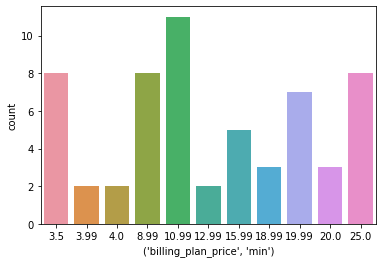

In [415]:
sns.countplot(x=packages[('billing_plan_price','min')][packages[('billing_plan_price','nunique')] == 1]);

## with several prices

In [670]:
packages.columns = ['min','max', 'n','freq','mean']
#packages
packages[packages.n > 1].reset_index() #.license_plan_id

0    370
1    371
2    374
3    375
4    381
5    435
6    498
7    521
8    529
9    591
Name: license_plan_id, dtype: int64

In [673]:
elastic_pack = packages[packages.n > 1].reset_index().license_plan_id.to_list()
elastic_pack

[370, 371, 374, 375, 381, 435, 498, 521, 529, 591]

In [676]:
subs[subs.license_plan_id == 370].sort_values(['license_id','sale_date'])

,sale_date,license_id,license_plan_id,operation_type,billing_period,license_name,billing_plan_price,sale_month,sale_year
42438,2020-12-14 18:02:00,3264,370,purchase,month,smart,3.99,12,2020
42439,2021-01-11 19:02:00,3264,370,purchase,month,smart,3.99,1,2021
42440,2021-02-11 19:02:00,3264,370,purchase,month,smart,3.99,2,2021
35758,2020-12-15 19:00:00,3490,370,purchase,month,smart,3.99,12,2020
35759,2021-01-12 20:00:00,3490,370,purchase,month,smart,3.99,1,2021
35760,2021-02-12 20:00:00,3490,370,purchase,month,smart,3.99,2,2021
43449,2020-12-16 13:01:00,3620,370,purchase,month,smart,3.99,12,2020
43450,2021-01-13 14:01:00,3620,370,purchase,month,smart,3.99,1,2021
43451,2021-02-13 14:02:00,3620,370,purchase,month,smart,3.99,2,2021
18,2020-12-16 13:00:00,3655,370,purchase,month,smart,8.00,12,2020


In [691]:
packages_elastic_m = subs[subs.license_plan_id.isin(elastic_pack)].pivot_table(index = ['billing_period',
                                                                                      'license_plan_id',
                                                                                      'billing_plan_price',
                                                                                      'sale_year',
                                                                                      'sale_month'],
                                                                             columns = 'operation_type',
                                                                             aggfunc = {'license_id':pd.Series.nunique,
                                                                                        'billing_plan_price':['count','sum']},
                                                                             fill_value = 0)

packages_elastic_m.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

packages_elastic_m['freq'] = packages_elastic_m.n_purch-packages_elastic_m.n_cancel
packages_elastic_m['revenue'] = packages_elastic_m.purch_amount-packages_elastic_m.cancel_amount

# packages_elastic_m.reset_index(inplace=True)

packages_elastic_m.head(35)


n_cancel  \
billing_period license_plan_id billing_plan_price sale_year sale_month             
month          370             3.99               2020      12                 2   
                                                  2021      1                  2   
                                                            2                  1   
                                                            3                  0   
                                                            4                  2   
                                                            5                  1   
                               8.00               2020      12                 0   
                                                  2021      1                  0   
                                                            2                  0   
                               40.00              2020      12                 0   
                                                  2021      1                  0   
                                                            2                  1   
               374             10.99              2020      12                 2   
                                                  2021      1                  7   
                                                            2                  5   
                                                            3                  0   
                               120.00             2020      12                 0   
                                                  2021      1                  0   
                                                            2                  0   
               529             4.00               2021      2                  1   
                                                            3                  1   
                                                            4                  4   
                                                            5                  1   
                                                            6                  0   
                               15.00              2021      3                  0   
                                                            4                  0   
                                                            5                  0   
               591             12.99              2021      3                  4   
                                                            4                  2   
                                                            5                  2   
                                                            6                  1   
                               120.00             2021      3                  0   
                                                            4                  0   
                                                            5                  0   
year           371             20.00              2020      12                59   

                                                                        n_purch  \
billing_period license_plan_id billing_plan_price sale_year sale_month            
month          370             3.99               2020      12                6   
                                                  2021      1                 6   
                                                            2                 6   
                                                            3                 1   
                                                            4                 0   
                                                            5                 0   
                               8.00               2020      12                1   
                                                  2021      1                 1   
                                                            2                 1   
                               40.00              

In [692]:
packages_elastic = subs[subs.license_plan_id.isin(elastic_pack)].pivot_table(index = ['billing_period',
                                                                                      'license_plan_id',
                                                                                      'billing_plan_price'],
                                                                                      #'sale_year',
                                                                                      #'sale_month'],
                                                                             columns = 'operation_type',
                                                                             aggfunc = {'license_id':pd.Series.nunique,
                                                                                        'billing_plan_price':['count','sum']},
                                                                             fill_value = 0)

packages_elastic.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount', 'cancel_cust', 'purch_cust']

packages_elastic['freq'] = packages_elastic.n_purch-packages_elastic.n_cancel
packages_elastic['revenue'] = packages_elastic.purch_amount-packages_elastic.cancel_amount

# packages_elastic.reset_index(inplace=True)

packages_elastic #.head(35)


n_cancel  n_purch  \
billing_period license_plan_id billing_plan_price                      
month          370             3.99                       8       19   
                               8.00                       0        3   
                               40.00                      1        2   
               374             10.99                     14      151   
                               120.00                     0        3   
               529             4.00                       7       13   
                               15.00                      0        3   
               591             12.99                      9      112   
                               120.00                     0        3   
year           371             20.00                     61      136   
                               40.00                      1        2   
                               45.00                      0        1   
                               120.00                     0        2   
               375             18.99                    111      215   
                               40.00                      3        3   
                               120.00                     1        0   
               381             20.00                      5       10   
                               45.00                      1        0   
               435             20.00                      7       13   
                               40.00                      1        0   
               498             19.99                    395     1286   
                               120.00                     0        1   
               521             15.99                     98      666   
                               120.00                     0        1   

                                                   cancel_amount  \
billing_period license_plan_id billing_plan_price                  
month          370             3.99                        31.92   
                               8.00                         0.00   
                               40.00                       40.00   
               374             10.99                      153.86   
                               120.00                       0.00   
               529             4.00                        28.00   
                               15.00                        0.00   
               591             12.99                      116.91   
                               120.00                       0.00   
year           371             20.00                     1220.00   
                               40.00                       40.00   
                               45.00                        0.00   
                               120.00                       0.00   
               375             18.99                     2107.89   
                               40.00                      120.00   
                               120.00                     120.00   
               381             20.00                      100.00   
                               45.00                       45.00   
               435             20.00                      140.00   
                               40.00                       40.00   
               498             19.99                     7896.05   
                               120.00                       0.00   
               521             15.99                     1567.02   
                               120.00                       0.00   

                                                   purch_amount  cancel_cust  \
billing_period license_plan_id billing_plan_price                              
month          370             3.99                       75.81            8   
                               8.00                       24.00            0   
                               40.00                      80.00            1   
         

In [ ]:
# In order to simplify I will analyze just 374 license_plan_id supposing both prices last the same time

In [695]:
packages_elastic.reset_index(inplace = True) #level=['license_plan_id','billing_plan_price'], 
packages_elastic

,billing_period,license_plan_id,billing_plan_price,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
0,month,370,3.99,8,19,31.92,75.81,8,7,11,43.89
1,month,370,8.00,0,3,0.00,24.00,0,1,3,24.00
2,month,370,40.00,1,2,40.00,80.00,1,1,1,40.00
3,month,374,10.99,14,151,153.86,1659.49,13,55,137,1505.63
4,month,374,120.00,0,3,0.00,360.00,0,1,3,360.00
5,month,529,4.00,7,13,28.00,52.00,7,5,6,24.00
6,month,529,15.00,0,3,0.00,45.00,0,1,3,45.00
7,month,591,12.99,9,112,116.91,1454.88,9,40,103,1337.97
8,month,591,120.00,0,3,0.00,360.00,0,1,3,360.00
9,year,371,20.00,61,136,1220.00,2720.00,61,136,75,1500.00


In [696]:
packs_e374 = packages_elastic[packages_elastic.license_plan_id == 374]
packs_e374

,billing_period,license_plan_id,billing_plan_price,n_cancel,n_purch,cancel_amount,purch_amount,cancel_cust,purch_cust,freq,revenue
3,month,374,10.99,14,151,153.86,1659.49,13,55,137,1505.63
4,month,374,120.00,0,3,0.00,360.00,0,1,3,360.00


In [704]:
packs_e374[['billing_plan_price','freq']]

,billing_plan_price,freq
3,10.99,137
4,120.00,3


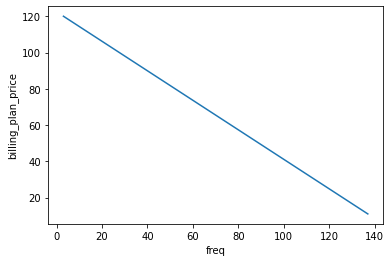

In [708]:
sns.lineplot(x='freq', y='billing_plan_price', data=packs_e374);

In [700]:
# Price Elasticity of Demand --> PED

percent_iQd = (packs_e374.freq[3]-packs_e374.freq[4])/packs_e374.freq[4]
percent_iP = (packs_e374.billing_plan_price[3]-packs_e374.billing_plan_price[4])/packs_e374.billing_plan_price[4]

ped374 = percent_iQd/percent_iP

ped374


-49.169800935693964

In [ ]:
# ped374 --> Elastic Demand

In [ ]:
# Price Optimization


In [ ]:
# Price Curve

# P = P0 + (bP)Q

# bP = iP/iQd

In [701]:
# Demand Curve
# Qd = Q0 + (bQ)P

# bQ = iQd/iP --> bQ = (Q2-Q1)/(P2-P1)

iQd = packs_e374.freq[3]-packs_e374.freq[4]
iP = packs_e374.billing_plan_price[3]-packs_e374.billing_plan_price[4]

bQ = iQd/iP

bQ


-1.2292450233923493

In [709]:
# 137 = Q0 + bQ*10.99
# 3 = Q0 + bQ*120

# 140 = 2*Q0 + 130.99*bQ --> Q0 = (140 - 130.99*bQ)/2 --> Q0 = [(Q2+Q1)-(P2+P1)*bQ]/2

Q0 = (140 - 130.99 * bQ)/2

Q0

150.50940280708193

In [711]:
# Price Curve

# P = 1/bQ * Qd - Q0/bQ

# P0 = -Q0/bQ

P0 = -1*Q0/bQ

P0

122.4405223880597

In [712]:
# Revenue PQ

# PQ = P * (Q0 + (bQ)P) --> PQ = (bQ)P**2 + Q0*P

# PQ Max:

# 2*(bQ)Po + Q0 = 0 --> Po = - Q0/(2*bQ) --> Po = P0/2

Po = -1*Q0/(2*bQ)

Po

61.22026119402985

Accordingly to the linear Price Elasticity of Demand and its Price Optimization the rate of package 374 should be increased up to 61.22 in order to get the maximum revenue.

## by sales

In [448]:
# Group
packages_sales = subs[subs.billing_period != 'trial'].groupby(['license_name',
                                                               'license_plan_id',
                                                               'operation_type']).agg({'billing_plan_price':['count','sum']})

packages_sales.columns =['n','amount']

packages_sales.reset_index(inplace=True)

packages_sales


,license_name,license_plan_id,operation_type,n,amount
0,enterprise,374,cancelation,14,153.86
1,enterprise,374,purchase,154,2019.49
2,enterprise,375,cancelation,115,2347.89
3,enterprise,375,purchase,218,4202.85
4,enterprise,384,cancelation,1,10.99
...,...,...,...,...,...
122,smart plus,524,cancelation,6,95.94
123,smart plus,524,purchase,7,111.93
124,smart plus,526,purchase,5,79.95
125,smart plus,528,cancelation,25,399.75


In [453]:
# Pivot
packages_sales = packages_sales.pivot(index=['license_name','license_plan_id'], 
                                      columns='operation_type', 
                                      values = ['n','amount'])

packages_sales.columns = ['n_cancel', 'n_purch', 'cancel_amount', 'purch_amount']

packages_sales.reset_index(inplace=True)

packages_sales


,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount
0,enterprise,374,14.0,154.0,153.86,2019.49
1,enterprise,375,115.0,218.0,2347.89,4202.85
2,enterprise,384,1.0,14.0,10.99,153.86
3,enterprise,385,19.0,6.0,360.81,113.94
4,enterprise,411,2.0,3.0,21.98,32.97
...,...,...,...,...,...,...
64,smart plus,522,5.0,35.0,79.95,559.65
65,smart plus,523,4.0,87.0,63.96,1391.13
66,smart plus,524,6.0,7.0,95.94,111.93
67,smart plus,526,NaN,5.0,NaN,79.95


In [454]:
packages_sales.fillna(0, inplace=True)
packages_sales['freq'] = packages_sales.n_purch-packages_sales.n_cancel
packages_sales['revenue'] = packages_sales.purch_amount-packages_sales.cancel_amount
packages_sales

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue
0,enterprise,374,14.0,154.0,153.86,2019.49,140.0,1865.63
1,enterprise,375,115.0,218.0,2347.89,4202.85,103.0,1854.96
2,enterprise,384,1.0,14.0,10.99,153.86,13.0,142.87
3,enterprise,385,19.0,6.0,360.81,113.94,-13.0,-246.87
4,enterprise,411,2.0,3.0,21.98,32.97,1.0,10.99
...,...,...,...,...,...,...,...,...
64,smart plus,522,5.0,35.0,79.95,559.65,30.0,479.70
65,smart plus,523,4.0,87.0,63.96,1391.13,83.0,1327.17
66,smart plus,524,6.0,7.0,95.94,111.93,1.0,15.99
67,smart plus,526,0.0,5.0,0.00,79.95,5.0,79.95


In [586]:
packages_sales = pd.merge(packages_sales, price, how='left', on='license_plan_id')
packages_sales #.sort_values('n_purch', ascending = False)

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate_x,rate_y
8,enterprise,497,2915.0,13182.0,32035.85,144870.18,10267.0,112834.33,10.99,10.99
36,smart,441,1140.0,6818.0,3990.00,23863.00,5678.0,19873.00,3.50,3.50
55,smart plus,513,1093.0,4883.0,9826.07,43898.17,3790.0,34072.10,8.99,8.99
37,smart,442,230.0,1639.0,5750.00,40975.00,1409.0,35225.00,25.00,25.00
9,enterprise,498,395.0,1287.0,7896.05,25827.14,892.0,17931.09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13,enterprise,502,3.0,1.0,59.97,19.99,-2.0,-39.98,19.99,19.99
30,smart,390,0.0,1.0,0.00,20.00,1.0,20.00,20.00,20.00
32,smart,399,0.0,1.0,0.00,20.00,1.0,20.00,20.00,20.00
34,smart,408,0.0,1.0,0.00,20.00,1.0,20.00,20.00,20.00


In [591]:
packages_sales.sort_values('freq', ascending = False) #.head(40)

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate
8,enterprise,497,2915.0,13182.0,32035.85,144870.18,10267.0,112834.33,10.99
36,smart,441,1140.0,6818.0,3990.00,23863.00,5678.0,19873.00,3.50
55,smart plus,513,1093.0,4883.0,9826.07,43898.17,3790.0,34072.10,8.99
37,smart,442,230.0,1639.0,5750.00,40975.00,1409.0,35225.00,25.00
9,enterprise,498,395.0,1287.0,7896.05,25827.14,892.0,17931.09,NaN
...,...,...,...,...,...,...,...,...,...
41,smart,446,1.0,2.0,25.00,50.00,1.0,25.00,25.00
5,enterprise,412,1.0,0.0,18.99,0.00,-1.0,-18.99,18.99
13,enterprise,502,3.0,1.0,59.97,19.99,-2.0,-39.98,19.99
11,enterprise,500,47.0,40.0,939.53,799.60,-7.0,-139.93,19.99


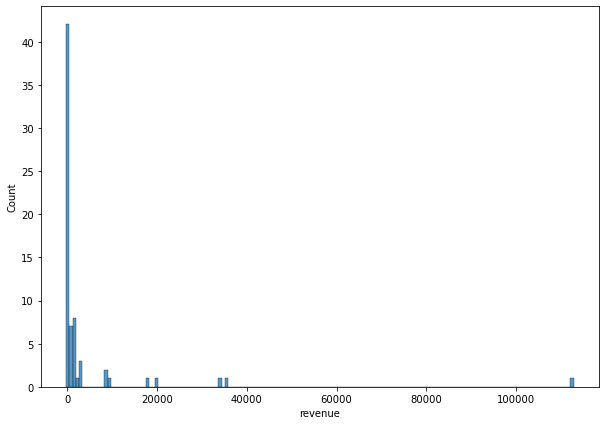

In [635]:
f, ax = plt.subplots(figsize=(10,7))
sns.histplot(data = packages_sales, x='revenue') #, kde=True)
plt.show()

In [ ]:
"""
for x in quantiles[1][1:]:
    plt.axvline(x, color = 'orange', linewidth=0.5)
sns.histplot(data = customers, x='expend') #, kde=True)
plt.show()
"""

In [457]:
# Average Purchased Package Fee
packages_sales.revenue.sum()/packages_sales.freq.sum()

10.21846182058241

In [465]:
packages_sales.rate #.isna().sum()

nan


## by license

In [ ]:
packages_license = pd.crosstab(subs[(subs.billing_period != 'trial') & (subs[subs.operation_type == 'purchase'])])


In [443]:
# packages_license = pd.crosstab([subs.license_name, subs.sale_year, subs.sale_month], subs.license_plan_id)
packages_license = pd.crosstab(subs.license_name, subs.license_plan_id)
packages_license

license_plan_id,370,371,374,375,377,381,384,385,390,398,399,407,408,411,412,435,438,439,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,475,478,481,484,487,490,493,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,526,528,529,535,537,591,593,605
license_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
enterprise,0,0,168,333,0,0,15,25,0,0,0,0,0,5,1,0,10,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16097,1682,1115,87,96,4,82,4,495,9,142,5,175,24,1115,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,12,4
smart,33,203,0,0,0,16,0,0,1,3,1,3,1,0,0,21,0,0,7958,1869,375,150,39,3,60,3,106,10,58,7,103,33,562,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,3,3,0,0,0
smart plus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5976,334,435,64,36,128,82,133,765,40,91,13,5,60,0,0,0,0,0,0
trial smart,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3398,109,62,26,90,59,96,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Every license_plan_id is exclusive of its license_name

In [652]:
packages_sales

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate
0,enterprise,374,14.0,154.0,153.86,2019.49,140.0,1865.63,NaN
1,enterprise,375,115.0,218.0,2347.89,4202.85,103.0,1854.96,NaN
2,enterprise,384,1.0,14.0,10.99,153.86,13.0,142.87,10.99
3,enterprise,385,19.0,6.0,360.81,113.94,-13.0,-246.87,18.99
4,enterprise,411,2.0,3.0,21.98,32.97,1.0,10.99,10.99
...,...,...,...,...,...,...,...,...,...
64,smart plus,522,5.0,35.0,79.95,559.65,30.0,479.70,15.99
65,smart plus,523,4.0,87.0,63.96,1391.13,83.0,1327.17,15.99
66,smart plus,524,6.0,7.0,95.94,111.93,1.0,15.99,15.99
67,smart plus,526,0.0,5.0,0.00,79.95,5.0,79.95,15.99


In [654]:
packages_sales.groupby('license_name').agg({'rate':[pd.Series.nunique,'count','mean','median','sum']})

rate                                
             nunique count       mean median     sum
license_name                                        
enterprise         4    23  14.946522  12.99  343.77
smart              5    23  13.216522   4.00  303.98
smart plus         2    13  11.682308   8.99  151.87

In [660]:
packages_l_bp = subs[subs.billing_period != 'trial'].pivot_table(values=['license_plan_id',
                                                                         'billing_plan_price'],
                                                                index = 'license_name',
                                                                         #'license_plan_id',
                                                                         #'operation_type'],
                                                                columns = ['billing_period'],
                                                                aggfunc = {'license_plan_id':pd.Series.nunique,
                                                                           'billing_plan_price': [pd.Series.nunique,
                                                                                                  'count',
                                                                                                  'min',
                                                                                                  'mean',
                                                                                                  'median',
                                                                                                  'max',
                                                                                                  'sum']})

packages_l_bp
                                                                    

billing_plan_price                                             \
                            count           max              mean              
billing_period              month  year   month   year      month       year   
license_name                                                                   
enterprise                  19655  2371  120.00  120.0  11.037218  19.956714   
smart                        9329  2495   40.00  120.0   3.520010  24.645291   
smart plus                   7188   974    8.99  120.0   8.990000  16.096786   

                                                                              \
               median           min        nunique             sum             
billing_period  month   year  month   year   month year      month      year   
license_name                                                                   
enterprise      10.99  19.99  10.99  18.99       3    4  216936.51  47317.37   
smart            3.50  25.00   3.50  20.00       6    5   32838.17  61490.00   
smart plus       8.99  15.99   8.99  15.99       1    2   64620.12  15678.27   

               license_plan_id       
                       nunique       
billing_period           month year  
license_name                         
enterprise                  15   12  
smart                       14   14  
smart plus                   8    6

## by billing period

In [ ]:
# Check if the same package could be sold both month and year

In [612]:
pack_period_xt = pd.crosstab(subs.license_plan_id[subs.billing_period != 'trial'],
                             subs.billing_period[subs.billing_period != 'trial'], 
                             values = 'license_plan_id',
                             aggfunc = pd.Series.nunique,
                             margins = True)

#pack_period_xt.fillna(0, inplace = T)

pack_period_xt


billing_period,month,year,All
license_plan_id,,,
370,1.0,NaN,1
371,NaN,1.0,1
374,1.0,NaN,1
375,NaN,1.0,1
381,NaN,1.0,1
...,...,...,...
537,1.0,NaN,1
591,1.0,NaN,1
593,1.0,NaN,1


In [613]:
pack_period_xt.columns

Index(['month', 'year', 'All'], dtype='object', name='billing_period')

In [614]:
pack_period_xt[pack_period_xt.All > 1]

billing_period,month,year,All
license_plan_id,,,


In [ ]:
# Month packages

In [617]:
month_packs = subs.license_plan_id[subs.billing_period == 'month'].sort_values().unique()
month_packs

array([370, 374, 384, 398, 407, 411, 438, 441, 443, 445, 447, 449, 451,
       453, 455, 497, 499, 501, 503, 505, 507, 509, 511, 513, 514, 515,
       516, 517, 518, 519, 520, 529, 535, 537, 591, 593, 605])

In [618]:
len(month_packs)

37

In [ ]:
# year packages

In [619]:
year_packs = subs.license_plan_id[subs.billing_period == 'year'].sort_values().unique()
year_packs

array([371, 375, 381, 385, 390, 399, 408, 412, 435, 439, 442, 444, 446,
       448, 450, 452, 454, 456, 498, 500, 502, 504, 506, 508, 510, 512,
       521, 522, 523, 524, 526, 528])

In [620]:
len(year_packs)

32

### prices

In [623]:
price

,license_plan_id,rate
0,384,10.99
1,385,18.99
2,390,20.00
3,398,3.99
4,399,20.00
5,407,3.99
6,408,20.00
7,411,10.99
8,412,18.99
9,438,10.99


In [625]:
# Prices of monthly packages
month_packs_price = price[price.license_plan_id.isin(month_packs)]
month_packs_price.sort_values('rate')

,license_plan_id,rate
21,451,3.50
11,441,3.50
13,443,3.50
15,445,3.50
17,447,3.50
19,449,3.50
23,453,3.50
25,455,3.50
3,398,3.99
5,407,3.99


In [631]:
month_packs899 = month_packs_price.license_plan_id[month_packs_price.rate == 8.99]
month_packs899

42    513
43    514
44    515
45    516
46    517
47    518
48    519
49    520
Name: license_plan_id, dtype: int64

In [629]:
# Prices of yearly packages
year_packs_price = price[price.license_plan_id.isin(year_packs)]
year_packs_price['month_fee'] = year_packs_price.rate/12
year_packs_price['month_fee_l'] = year_packs_price.rate/acl
year_packs_price.sort_values('month_fee_l')

/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_2007/3734391150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_packs_price['month_fee'] = year_packs_price.rate/12
/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_2007/3734391150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_packs_price['month_fee_l'] = year_packs_price.rate/acl


,license_plan_id,rate,month_fee,month_fee_l
54,528,15.99,1.332500,3.635241
52,524,15.99,1.332500,3.635241
51,523,15.99,1.332500,3.635241
50,522,15.99,1.332500,3.635241
53,526,15.99,1.332500,3.635241
1,385,18.99,1.582500,4.317274
8,412,18.99,1.582500,4.317274
10,439,18.99,1.582500,4.317274
31,502,19.99,1.665833,4.544619
41,512,19.99,1.665833,4.544619


In [630]:
pack_boundary

6.131484628666717

I would say all the packages with a monthly fee below the pack_boundary could be increased in price. Maybe include some more products inside the package and make a discount until reaching a package price slightly above the pack_boundary (8.99).  
That includes all the yearly packages (year_packs) 

In [633]:
packages_sales[packages_sales.rate == 8.99]

,license_name,license_plan_id,n_cancel,n_purch,cancel_amount,purch_amount,freq,revenue,rate
55,smart plus,513,1093.0,4883.0,9826.07,43898.17,3790.0,34072.10,8.99
56,smart plus,514,63.0,271.0,566.37,2436.29,208.0,1869.92,8.99
57,smart plus,515,45.0,390.0,404.55,3506.10,345.0,3101.55,8.99
58,smart plus,516,22.0,42.0,197.78,377.58,20.0,179.80,8.99
59,smart plus,517,6.0,30.0,53.94,269.70,24.0,215.76,8.99
60,smart plus,518,21.0,107.0,188.79,961.93,86.0,773.14,8.99
61,smart plus,519,18.0,64.0,161.82,575.36,46.0,413.54,8.99
62,smart plus,520,29.0,104.0,260.71,934.96,75.0,674.25,8.99
